## This Notebook gives an example on how to plot all cell types, how to quantify cell types using equal width columns, and how to quantify cell types by layer (Figure 2 and Supplementary Figures 6-7 in the manuscript)

In [90]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import napari
from shapely import Polygon,Point
import seaborn as sns
from adjustText import adjust_text
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
import scipy.stats as stats
from scipy.spatial import KDTree
from scipy.stats import sem

In [4]:
adata_all=sc.read_h5ad('../W_Data_Short/adata_short_all.h5ad')

### Choose same width columns:

In [5]:
X=adata_all.obsm["X_spatial"]

In [7]:
cmap = [ '#800000','#800000',  #Astro  P, WM
    '#4363d8', '#bfef45', #L2, L3, 
    '#42d4f4', # L4 
    '#f58231',  #L5
    '#008080','#e6194B',  '#ffe119', '#e6beff', '#e6194B', '#f032e6', '#911eb4', # L6,L6Car3,  L6CT, L6b, # L5ET, L56NP,
]

In [8]:
##Excitatory neurons 
cell_types_plot =  ['Astro.WM','Astro.P','L2.IT', 'L3.IT', 'L4.IT', 'L5.6.NP', 'L5.ET', 'L5.IT', 'L6.CT', 'L6.IT', 'L6.IT.Car3', 'L6b']
colors = [cmap[cell_types_plot.index(nm)%len(cmap)] if nm in cell_types_plot else "gray" 
 for nm in adata_all.obs["cluster_names"]]
size = [50 if nm in cell_types_plot else 10
 for nm in adata_all.obs["cluster_names"]]
V = napari.view_points(X,face_color=colors,size=size)

In [ ]:
##Draw shape in interface and save coordinates  
paths = V.layers[-1].data

In [10]:
##Projection
H1_path = [[19153.5489573113, 774.8946785515946],
  [21469.0832103889, -1011.3994592523427],
  [20779.438495011244, -1905.370906101668],
  [18463.90424193364, -119.07676829773277]]
H2_path_1 = [[20088.48971740354, 5347.519518327886],
  [17716.773644550052, 8225.725930272227],
  [18588.123204084128, 8943.740363504616],
  [20959.83927693758, 6065.533951560273]]
H2_path_2= [[21213.14658678075, 6331.528863252207],
  [18428.558212399854, 8794.830110147508],
  [19176.65121521971, 9640.496498484043],
  [21961.23958960058, 7177.195251588745]]
H3_path_1 = [[17564.16201780671, 13032.652234493276],
  [20395.88896313461, 14227.551789266368],
  [20834.84086468564, 13187.303737427314],
  [18003.113919357744, 11992.404182654214]]
H3_path_2 =  [[16412.610972909293, 17577.393349625145],
  [19462.99880461167, 17953.68647352598],
  [19601.231829969754, 16833.112329646792],
  [16550.84399826738, 16456.819205745953]]
H3_path_3 = [[16533.945717294817, 15939.293326058607],
  [19543.77793804265, 16561.68584034619],
  [19772.416717989618, 15456.009988419159],
  [16762.584497241784, 14833.617474131564]]
H3_path_4 = [[17068.620872475774, 14113.090005595543],
  [19908.762512580488, 15287.848662953003],
  [20340.3155618752, 14244.509433903002],
  [17500.173921770485, 13069.750776545532]]
H5_path_1 = [[19388.516476123117, 34296.61458503952],
  [18460.462140414602, 30484.96565611136],
  [17363.442525287002, 30752.066283694927],
  [18291.496860995554, 34563.71521262312]]
H5_path_2 = [[22787.32013179405, 30894.74769646524],
  [19208.745930088648, 29287.340128262622],
  [18746.122625549597, 30317.27918438564],
  [22324.696827255048, 31924.686752588274]]
H6_path_1 = [[28870.8875018958, -3549.3246012883146],
  [27804.78933826677, -266.20621891356586],
  [28878.659542144513, 82.5022072160973],
  [29944.75770577351, -3200.6161751587542]]
H6_path_2 = [[31805.863123401115, 1497.8961670561155],
  [28355.282679905944, 1592.3747897651638],
  [28386.18555148821, 2721.019903943332],
  [31836.765994983423, 2626.5412812342242]]
H6_path_3 =  [[31700.110874583264, -214.68056379385018],
  [28558.118340679335, -476.9885737737402],
  [28464.185309908702, 648.1653565666923],
  [31606.177843812708, 910.473366546511]]
H6_path_4 =[[26654.75291066144, -3184.858015133872],
  [27563.009180102756, 145.38254017151348],
  [28652.29250252985, -151.69762529307647],
  [27744.03623308845, -3481.938180598524]]
H7_path_1 = [[26482.81962395221, 5263.265728376346],
  [27572.588219432226, 9872.400150832711],
  [28671.36194595592, 9612.609698484093],
  [27581.593350475858, 5003.475276027683]]
H7_path_2 =  [[31744.80359372502, 6791.0845787575645],
  [28817.974624378792, 9484.75722530951],
  [29582.569739199396, 10315.533423586014],
  [32509.39870854565, 7621.860777033947]]
H8_path_1 = [[31842.470513538778, 13822.605601817173],
  [29026.449934068678, 14270.806679994308],
  [29203.919914927617, 15385.839947266715],
  [32019.94049439777, 14937.638869089515]]
H8_path_2 = [[27038.26722384071, 17447.631762891837],
  [29318.03758647336, 16268.803481001094],
  [28799.44391032349, 15265.88006404068],
  [26519.673547690836, 16444.7083459315]]
H8_path_3 = [[31310.382664815563, 18282.000723243727],
  [29670.07052812814, 15320.644937933263],
  [28682.396480748277, 15867.723321131258],
  [30322.708617435776, 18829.07910644172]]
H8_path_4 = [[27703.15123303357, 19263.8123103695],
  [29796.895191318177, 16233.15467232711],
  [28867.952962554795, 15591.390605983126],
  [26774.209004270208, 18622.048244025576]]
H9_path_1 = [[30806.355761634048, 21444.664516388453],
  [27143.631263215422, 24987.706779868306],
  [27928.634368184037, 25799.22690064157],
  [31591.35886660269, 22256.18463716166]]
H9_path_2 =  [[26843.443583610486, 20656.581354911596],
  [27006.390195102595, 25380.080755737094],
  [28134.78707678765, 25341.154432589483],
  [27971.840465295427, 20617.65503176386]]
H9_path_3 =  [[29272.828312162026, 20845.546845505953],
  [26935.835949510656, 25246.63622710948],
  [27933.035707349165, 25776.152444233285],
  [30270.028070000517, 21375.063062629695]]
C4_path_1 = [[-2388.2664816377387, 34329.209790127876],
  [1202.6863002803268, 30958.23275531709],
  [432.26962082951786, 30137.541931932275],
  [-3158.6831610885997, 33508.51896674309]]
C4_path_2 =  [[736.4669166025333, 34384.05182869643],
  [1869.7440271306796, 31620.764122534234],
  [828.2829609967546, 31193.64103103572],
  [-304.9941495314247, 33956.928737197915]]
C5_path_1 = [[8437.529795754253, -3525.7962175824005],
  [7823.545713673018, -567.3621938049054],
  [8925.704485454875, -338.6236326737592],
  [9539.68856753614, -3297.057656451281]]
C5_path_2 =  [[9637.550509882232, 3387.339738988052],
  [8825.39579361531, -163.54488683862195],
  [7728.086968525296, 87.43047040512562],
  [8540.241684792183, 3638.315096231815]]
C5_path_3 =  [[11051.975566609603, 2773.129984540841],
  [8851.303518136332, -210.22920003889442],
  [7945.446138086944, 457.97562976564916],
  [10146.118186560198, 3441.334814345416]]
C6_path_1 = [[6210.196901651774, 6527.481689835259],
  [10254.447410402625, 9443.157722697399],
  [10912.733980514411, 8530.06732236754],
  [6868.483471763511, 5614.391289505367]]
C6_path_2 =  [[5453.523376973671, 8435.726335895142],
  [10027.30407606306, 10106.803323672932],
  [10413.594433302083, 9049.516679726174],
  [5839.813734212705, 7378.43969194834]]
C6_path_3 =  [[5117.139319357787, 10229.974351577286],
  [9964.26573382397, 10883.617575247323],
  [10114.699138249405, 9768.070589057583],
  [5267.572723783184, 9114.42736538753]]
C6_path_4 =  [[8043.563065049323, 4620.616737461103],
  [10261.135622420761, 9085.983559899258],
  [11269.303531579104, 8585.31125738255],
  [9051.730974207636, 4119.944434944339]]
#C7_path = 
C8_path_1 = [[12559.554620655108, 24817.340499319198],
  [7971.788269388886, 25315.529551106672],
  [8093.308472602985, 26434.595289915134],
  [12681.074823869263, 25936.406238127638]]
C8_path_2 = [[11983.198229997364, 21792.965346421646],
  [7503.263135232222, 23701.407048212615],
  [7944.423316448685, 24737.000106355194],
  [12424.358411213849, 22828.558404564275]]
C8_path_3 = [[9956.435895983905, 19853.92319393057],
  [7419.537792622589, 24035.553492609215],
  [8381.923478114206, 24619.410564095757],
  [10918.821581475557, 20437.78026541709]]
#C9_path = 
C10_path_1 = [[-515.5130637540669, 4554.4197066326215],
  [-1530.2745316166329, 8915.677829746683],
  [-430.5818141737063, 9171.550275377967],
  [584.1796536887848, 4810.292152263768]]
C10_path_2 =  [[1266.5130357641299, 5324.690161493832],
  [-1575.2276554613868, 8589.459517199122],
  [-723.5897892369758, 9330.74740057711],
  [2118.1509019885293, 6065.978044871761]]
C11_path_1 = [[1183.2456082848414, 12694.30170916704],
  [19.2807728320156, 16531.963555818595],
  [1099.7454375132909, 16859.669047999498],
  [2263.7102729660496, 13022.007201347807]]
C11_path_2 = [[-2619.9643335601945, 12947.324620641772],
  [-1496.4178337757855, 16753.80818325393],
  [-413.5368145598993, 16434.177960258297],
  [-1537.0833143443629, 12627.69439764612]]
C11_path_3 = [[-1061.4175490986222, 12602.21380107969],
  [-787.8617870715782, 16705.287519344743],
  [338.7052889478041, 16630.17823590067],
  [65.14952692064946, 12527.104517635526]]

In [15]:
polygon_C4_1 = [Polygon(C4_path_1)] 
keep_C4_1 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C4_1])  for p in X]
polygon_C4_2 = [Polygon(C4_path_2)] 
keep_C4_2 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C4_2])  for p in X]

polygon_C5_1 = [Polygon(C5_path_1)] 
keep_C5_1 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C5_1]) for p in X]
polygon_C5_2 = [Polygon(C5_path_2)] 
keep_C5_2 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C5_2]) for p in X]
polygon_C5_3 = [Polygon(C5_path_3)] 
keep_C5_3 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C5_3]) for p in X]

polygon_C6_1 = [Polygon(C6_path_1)] 
keep_C6_1 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C6_1])  for p in X]
polygon_C6_2 = [Polygon(C6_path_2)] 
keep_C6_2 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C6_2])  for p in X]
polygon_C6_3 = [Polygon(C6_path_3)] 
keep_C6_3 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C6_3])  for p in X]
polygon_C6_4 = [Polygon(C6_path_4)] 
keep_C6_4 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C6_4])  for p in X]

polygon_C8_1 = [Polygon(C8_path_1)] 
keep_C8_1 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C8_1])  for p in X]
polygon_C8_2 = [Polygon(C8_path_2)] 
keep_C8_2 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C8_2])  for p in X]
polygon_C8_3 = [Polygon(C8_path_3)] 
keep_C8_3 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C8_3])  for p in X]

polygon_C10_1 = [Polygon(C10_path_1)] 
keep_C10_1 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C10_1])  for p in X]
polygon_C10_2 = [Polygon(C10_path_2)] 
keep_C10_2 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C10_2])  for p in X]

polygon_C11_1 = [Polygon(C11_path_1)] 
keep_C11_1 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C11_1])  for p in X]
polygon_C11_2 = [Polygon(C11_path_2)] 
keep_C11_2 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C11_2])  for p in X]
polygon_C11_3 = [Polygon(C11_path_3)] 
keep_C11_3 = [np.any([polygon.contains(Point(p)) for polygon in polygon_C11_3])  for p in X]

polygon_H1 = [Polygon(H1_path)] 
keep_H1 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H1]) for p in X]

polygon_H2_1 = [Polygon(H2_path_1)] 
keep_H2_1 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H2_1]) for p in X]
polygon_H2_2 = [Polygon(H2_path_2)] 
keep_H2_2 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H2_2]) for p in X]

polygon_H3_1 = [Polygon(H3_path_1)] 
keep_H3_1= [np.any([polygon.contains(Point(p)) for polygon in polygon_H3_1]) for p in X]
polygon_H3_2 = [Polygon(H3_path_2)] 
keep_H3_2 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H3_2]) for p in X]
polygon_H3_3 = [Polygon(H3_path_3)] 
keep_H3_3 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H3_3]) for p in X]
polygon_H3_4 = [Polygon(H3_path_4)] 
keep_H3_4 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H3_4]) for p in X]

polygon_H5_1 = [Polygon(H5_path_1)] 
keep_H5_1 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H5_1]) for p in X]
polygon_H5_2 = [Polygon(H5_path_2)] 
keep_H5_2 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H5_2]) for p in X]

polygon_H6_1 = [Polygon(H6_path_1)] 
keep_H6_1 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H6_1]) for p in X]
polygon_H6_2 = [Polygon(H6_path_2)] 
keep_H6_2 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H6_2]) for p in X]
polygon_H6_3 = [Polygon(H6_path_3)] 
keep_H6_3 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H6_3]) for p in X]
polygon_H6_4 = [Polygon(H6_path_4)] 
keep_H6_4 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H6_4]) for p in X]

polygon_H7_1 = [Polygon(H7_path_1)] 
keep_H7_1 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H7_1]) for p in X]
polygon_H7_2 = [Polygon(H7_path_2)] 
keep_H7_2 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H7_2]) for p in X]

polygon_H8_1 = [Polygon(H8_path_1)] 
keep_H8_1 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H8_1]) for p in X]
polygon_H8_2 = [Polygon(H8_path_2)] 
keep_H8_2 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H8_2]) for p in X]
polygon_H8_3 = [Polygon(H8_path_3)] 
keep_H8_3 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H8_3]) for p in X]
polygon_H8_4 = [Polygon(H8_path_4)] 
keep_H8_4 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H8_4]) for p in X]

polygon_H9_1 = [Polygon(H9_path_1)] 
keep_H9_1 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H9_1]) for p in X]
polygon_H9_2 = [Polygon(H9_path_2)] 
keep_H9_2 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H9_2]) for p in X]
polygon_H9_3 = [Polygon(H9_path_3)] 
keep_H9_3 = [np.any([polygon.contains(Point(p)) for polygon in polygon_H9_3]) for p in X]

In [16]:
C4_p_1= adata_all[keep_C4_1]
C4_p_2= adata_all[keep_C4_2]

C5_p_1= adata_all[keep_C5_1]
C5_p_2= adata_all[keep_C5_2]
C5_p_3= adata_all[keep_C5_3]

C6_p_1= adata_all[keep_C6_1]
C6_p_2= adata_all[keep_C6_2]
C6_p_3= adata_all[keep_C6_3]
C6_p_4= adata_all[keep_C6_4]

C8_p_1= adata_all[keep_C8_1]
C8_p_2= adata_all[keep_C8_2]
C8_p_3= adata_all[keep_C8_3]

C10_p_1= adata_all[keep_C10_1]
C10_p_2= adata_all[keep_C10_2]

C11_p_1= adata_all[keep_C11_1]
C11_p_2= adata_all[keep_C11_2]
C11_p_3= adata_all[keep_C11_3]

H1_p= adata_all[keep_H1]

H2_p_1= adata_all[keep_H2_1]
H2_p_2= adata_all[keep_H2_2]

H3_p_1= adata_all[keep_H3_1]
H3_p_2= adata_all[keep_H3_2]
H3_p_3= adata_all[keep_H3_3]
H3_p_4= adata_all[keep_H3_4]

H5_p_1= adata_all[keep_H5_1]
H5_p_2= adata_all[keep_H5_2]

H6_p_1= adata_all[keep_H6_1]
H6_p_2= adata_all[keep_H6_2]
H6_p_3= adata_all[keep_H6_3]
H6_p_4= adata_all[keep_H6_4]

H7_p_1= adata_all[keep_H7_1]
H7_p_2= adata_all[keep_H7_2]

H8_p_1= adata_all[keep_H8_1]
H8_p_2= adata_all[keep_H8_2]
H8_p_3= adata_all[keep_H8_3]
H8_p_4= adata_all[keep_H8_4]

H9_p_1= adata_all[keep_H9_1]
H9_p_2= adata_all[keep_H9_2]
H9_p_3= adata_all[keep_H9_3]

In [17]:
patient_sections = {
    'C4': [C4_p_1, C4_p_2],
    'C5': [C5_p_1, C5_p_2, C5_p_3],
    'C6': [C6_p_1, C6_p_2, C6_p_3, C6_p_4],
    'C8': [C8_p_1, C8_p_2, C8_p_3],
    'C10': [C10_p_1, C10_p_2],
    'C11': [C11_p_1, C11_p_2, C11_p_3],
    'H1': [H1_p],
    'H2': [H2_p_1, H2_p_2],
    'H3': [H3_p_1, H3_p_2, H3_p_3, H3_p_4],
    'H5': [H5_p_1, H5_p_2],
    'H6': [H6_p_1, H6_p_2, H6_p_3, H6_p_4],
    'H7': [H7_p_1, H7_p_2],
    'H8': [H8_p_1, H8_p_2, H8_p_3, H8_p_4],
    'H9': [H9_p_1, H9_p_2, H9_p_3]
}

### Quantification of mean cell types per patient. Save quantification at "mean_cells_all_samples.csv"

In [106]:
uclusters = adata_all.obs['cluster_names'].unique()
mean_cells = {}
for patient, sections in patient_sections.items():
    all_section_counts = {cl: [] for cl in uclusters}
    
    for adata in sections:
        for cl in uclusters:
            cells = len(adata.obs.loc[adata.obs['cluster_names'] == cl])
            all_section_counts[cl].append(cells)
    
    mean_counts = {cl: sum(all_section_counts[cl]) / len(all_section_counts[cl]) for cl in uclusters}
    mean_cells[patient] = pd.DataFrame({'Cluster': uclusters, 'Mean Cells': mean_counts.values()})

df_all = (
    pd.concat(mean_cells, names=["Sample"])
      .reset_index(level=0)
      .rename(columns={"level_0": "Sample"})
)

df_all.to_csv("mean_cells_all_samples.csv", index=False)

### Calculate Percent lost in HD vs CTL. Save quantification at "percent_lost_clusters.csv'"

In [108]:
# Percent Lost
def assign_hd(patient):
    return True if patient.startswith('H') else False

all_cells_list = []
for patient, mean_df in mean_cells.items():
    mean_df['HD'] = assign_hd(patient)
    mean_df['Patient'] = patient
    all_cells_list.append(mean_df)

all_cells_df = pd.concat(all_cells_list, ignore_index=True)

all_cells_df['Cluster'] = pd.Categorical(all_cells_df['Cluster'], categories=uclusters, ordered=True)

mean_values = all_cells_df.groupby(['Cluster', 'HD'])['Mean Cells'].mean().reset_index()

plost_df = mean_values.pivot(index='Cluster', columns='HD', values='Mean Cells')
plost_df.columns = ['CTL', 'HD']

plost_df['Percent Lost'] = ((plost_df['CTL'] - plost_df['HD']) / plost_df['CTL']) * 100
plost_df.to_csv('percent_lost_clusters.csv')

/var/folders/7p/t1dymgvj689ffh7fbygsmbzc0000gp/T/ipykernel_52699/2791750808.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = all_cells_df.groupby(['Cluster', 'HD'])['Mean Cells'].mean().reset_index()


### Spatial projection of cell clusters

In [ ]:
###PLOT CLUSTER NAME
# Function to plot cell-types across single cells in X_spatial

def plot_cluster_name_scdata(scdata,cmap,clusters=['Neuron','Astro'],transpose=1,flipx=1,flipy=1,sbig=30,small=5):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(10, 10), facecolor="white")

    from matplotlib import pylab as plt
    x,y = (scdata.obsm['X_spatial']*[-flipx,-flipy])[:,::-transpose].T
    
    plt.scatter(x, y, c='gray', s=small, marker='.')
    i=0
    for cluster in clusters:
        cluster_ = str(cluster)
        inds = scdata.obs["cluster_names"] == cluster_
        x_ = x[inds]
        y_ = y[inds]
        col = cmap[int(i) % len(cmap)]
        i=i+1
        plt.scatter(x_, y_, c=col, s=sbig, marker='.',label = cluster_, linewidth=0.5, edgecolors='black')
    
    plt.grid(False)
    plt.axis("off")
    plt.axis("equal")
    plt.legend()
    plt.tight_layout()
    return fig

In [21]:
C5=adata_all[adata_all.obs['patient']=='C5'].copy()
H8=adata_all[adata_all.obs['patient']=='H8'].copy()

In [109]:
##################################################
#### FIGURE 2A
##################################################

In [23]:
C5_col = C5.copy()
C5_col.obs['cluster_general'] = ''
C5_col.obs['cluster_names'] = ''

C5_col.obs['cluster_names'] = C5_col.obs['cluster_names'].astype(str)  # Convert to string to allow new categories
C5_col.obs.loc[C5_p_2.obs.index, 'cluster_names'] = C5_p_2.obs['cluster_names'].values  # Assign new values
C5_col.obs['cluster_names'] = C5_col.obs['cluster_names'].astype('category')  # Convert back to categorical


C5_col.obs['cluster_general'] = C5_col.obs['cluster_general'].astype(str)  # Convert to string to allow new categories
C5_col.obs.loc[C5_p_2.obs.index, 'cluster_general'] = C5_p_2.obs['cluster_general'].values  # Assign new values
C5_col.obs['cluster_general'] = C5_col.obs['cluster_general'].astype('category')  # Convert back to categorical


H8_col = H8.copy()
H8_col.obs['cluster_general'] = ''
H8_col.obs['cluster_names'] = ''

H8_col.obs['cluster_names'] = H8_col.obs['cluster_names'].astype(str)  # Convert to string to allow new categories
H8_col.obs.loc[H8_p_3.obs.index, 'cluster_names'] = H8_p_3.obs['cluster_names'].values  # Assign new values
H8_col.obs['cluster_names'] = H8_col.obs['cluster_names'].astype('category')  # Convert back to categorical


H8_col.obs['cluster_general'] = H8_col.obs['cluster_general'].astype(str)  # Convert to string to allow new categories
H8_col.obs.loc[H8_p_3.obs.index, 'cluster_general'] = H8_p_3.obs['cluster_general'].values  # Assign new values
H8_col.obs['cluster_general'] = H8_col.obs['cluster_general'].astype('category')  # Convert back to categorical

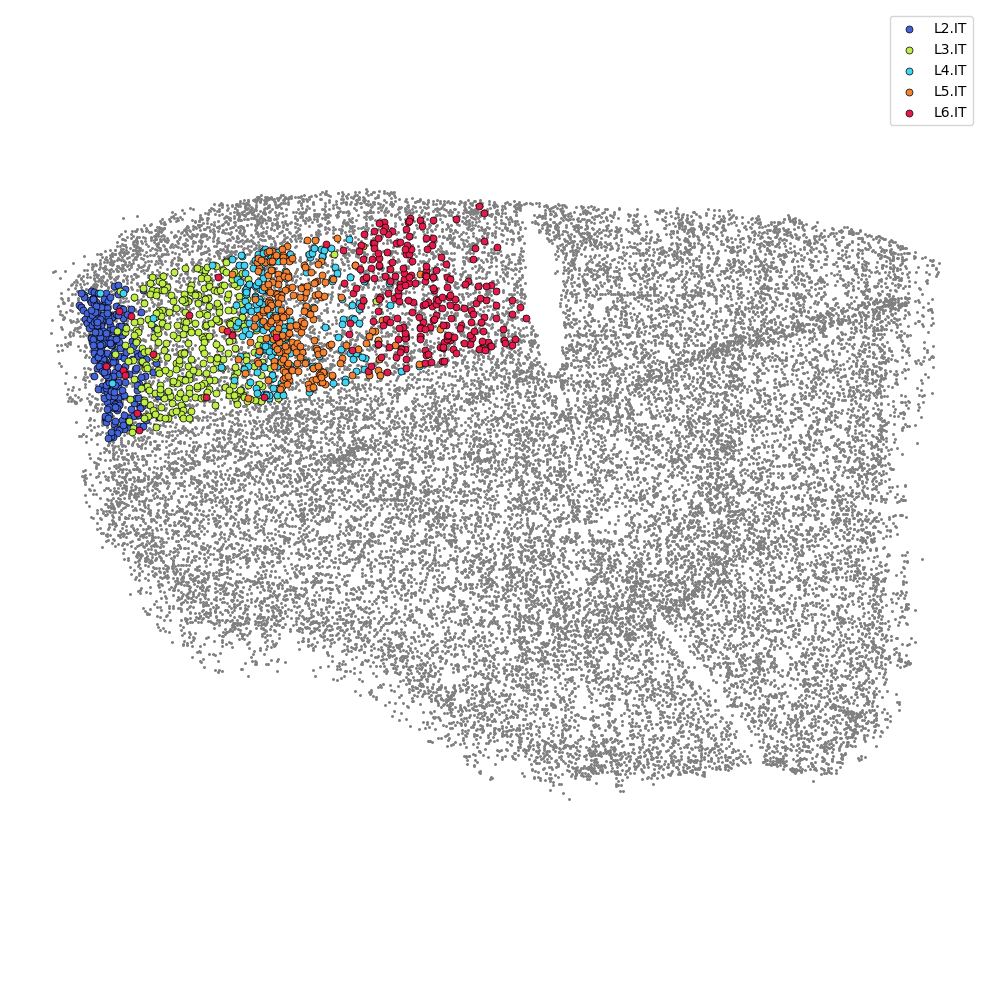

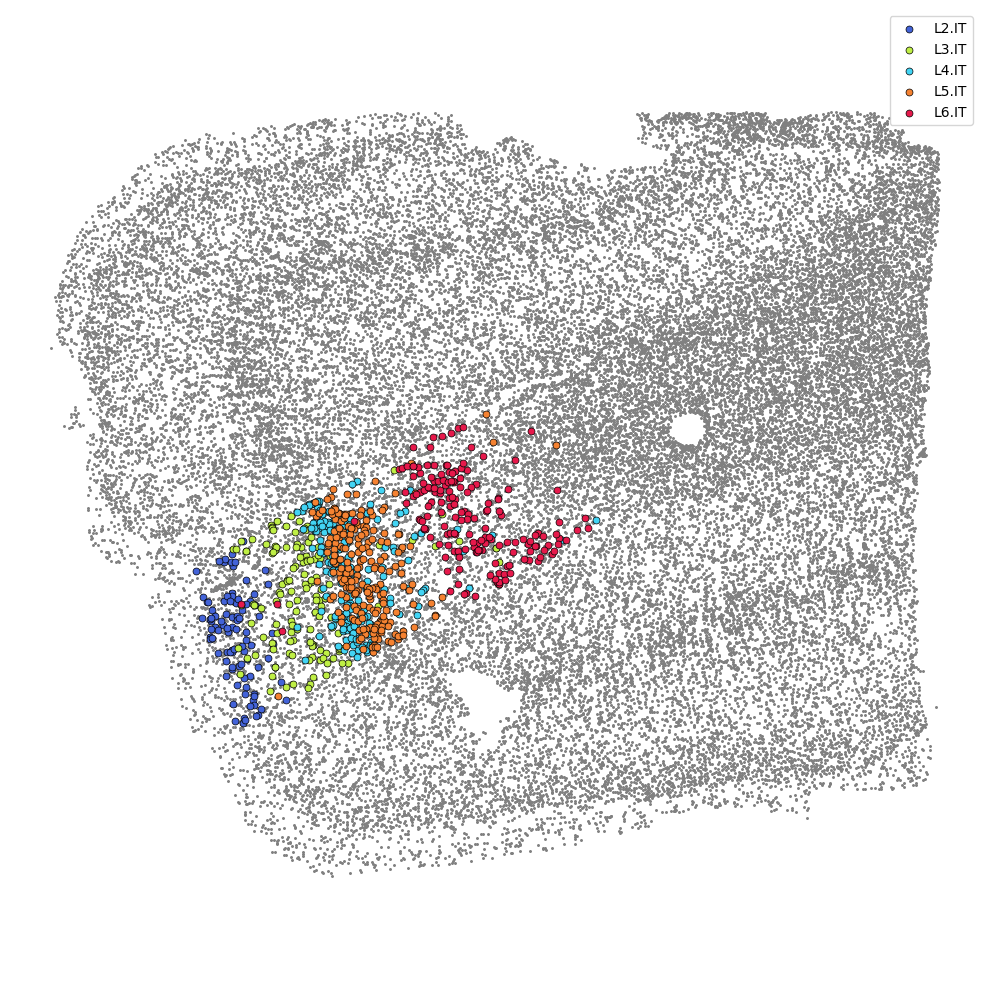

In [34]:
#Coumn Example
cmap = ['#4363d8', '#bfef45', #L2, L3, 
    '#42d4f4', # L4 '#FF6347','#FF6347','#FF6347', #L4.5,
    '#f58231', # L5
      '#e6194B', #L6CT, L6, L6Car3, L6b
       ]

plot_cluster_name_scdata(C5_col,cmap,clusters=['L2.IT','L3.IT','L4.IT','L5.IT', 'L6.IT'],transpose=1,flipx=1,flipy=1,sbig=100,small=5);
plot_cluster_name_scdata(H8_col,cmap,clusters=['L2.IT','L3.IT','L4.IT','L5.IT', 'L6.IT'],transpose=1,flipx=1,flipy=1,sbig=100,small=5);

In [ ]:
##################################################
#### FIGURE 2C
##################################################

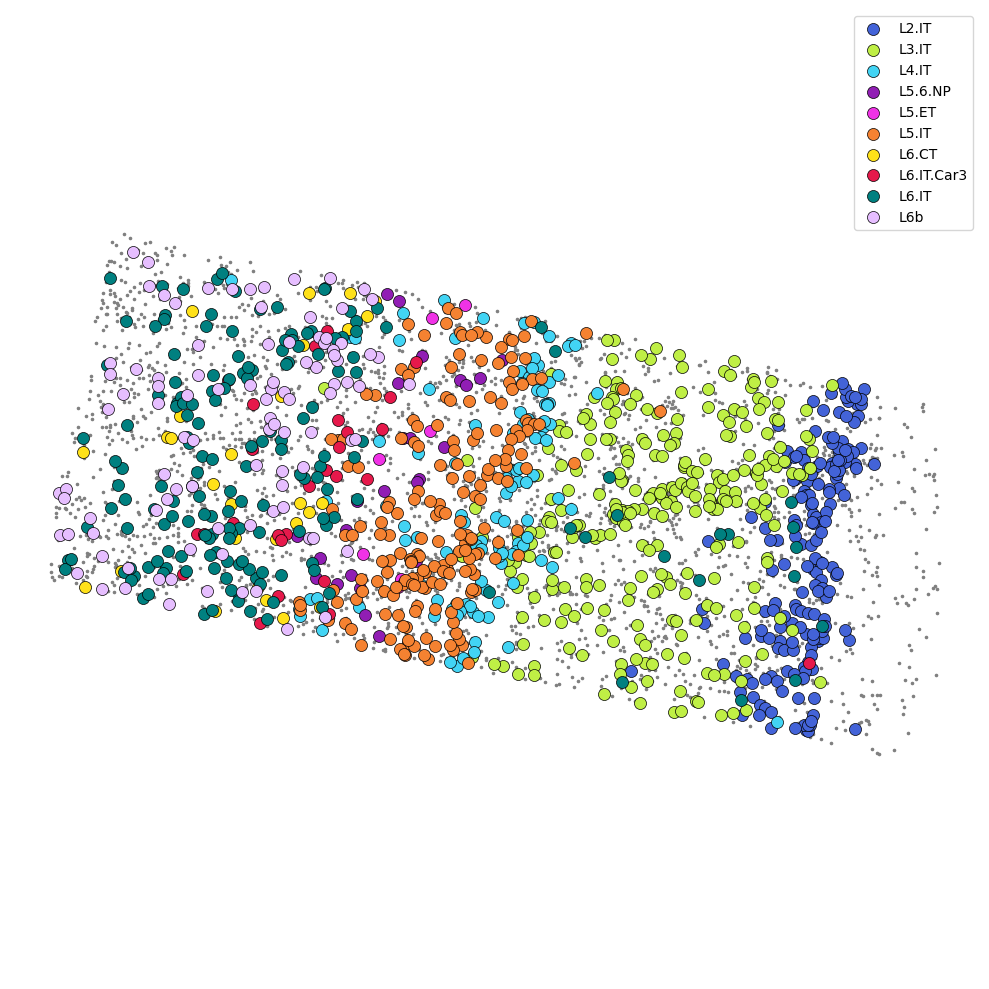

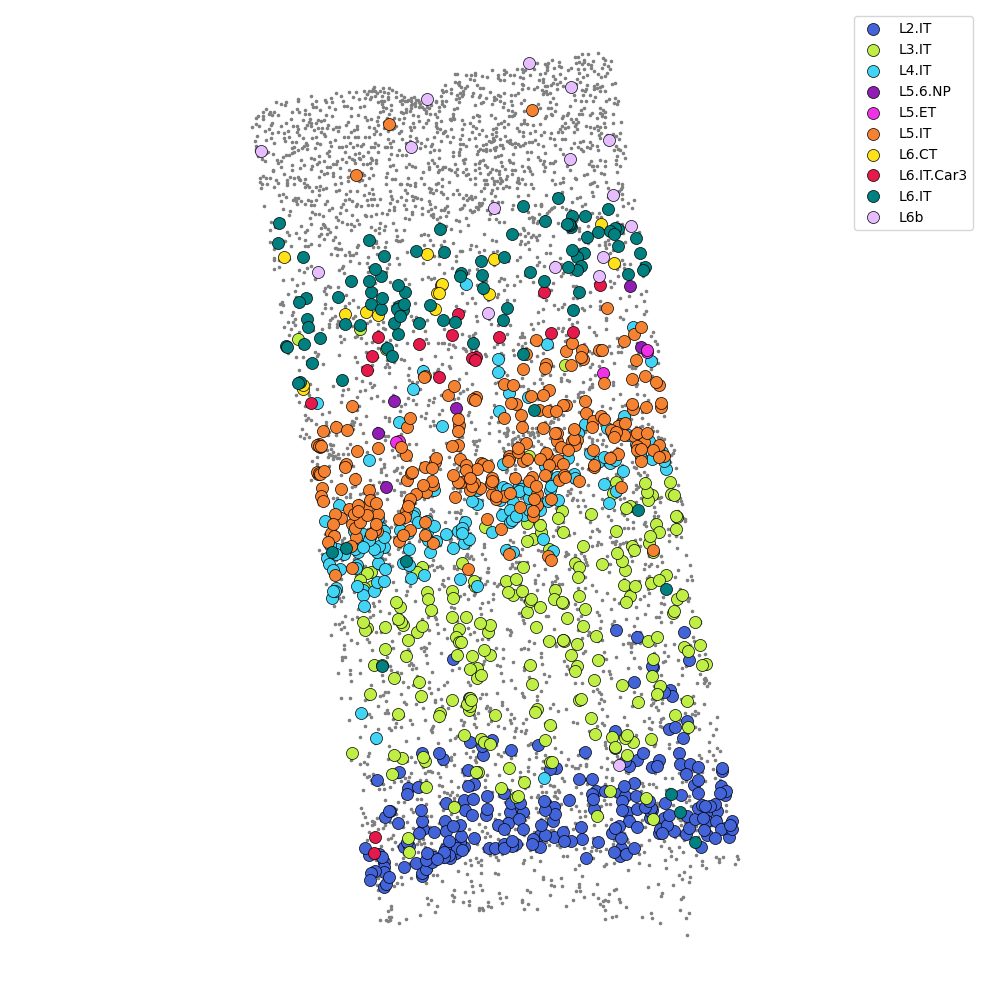

In [38]:
#Excitatory Neuron column
cmap = ['#4363d8', '#bfef45', #L2, L3, 
    '#42d4f4', # L4 '#FF6347','#FF6347','#FF6347', #L4.5,
    '#911eb4', '#f032e6','#f58231', #L56NP, L5ET, L5
    '#ffe119',   '#e6194B','#008080', '#e6beff', #L6CT, L6, L6Car3, L6b 
       ]

plot_cluster_name_scdata(C5_p_1,cmap,clusters=['L2.IT','L3.IT','L4.IT','L5.6.NP','L5.ET','L5.IT', 'L6.CT', 'L6.IT.Car3','L6.IT', 'L6b'],transpose=1,flipx=1,flipy=1,sbig=300,small=10);
plot_cluster_name_scdata(H8_p_1,cmap,clusters=['L2.IT','L3.IT','L4.IT','L5.6.NP','L5.ET','L5.IT', 'L6.CT', 'L6.IT.Car3','L6.IT', 'L6b'],transpose=1,flipx=1,flipy=1,sbig=300,small=10);

In [ ]:
##################################################
#### FIGURE 2E
##################################################

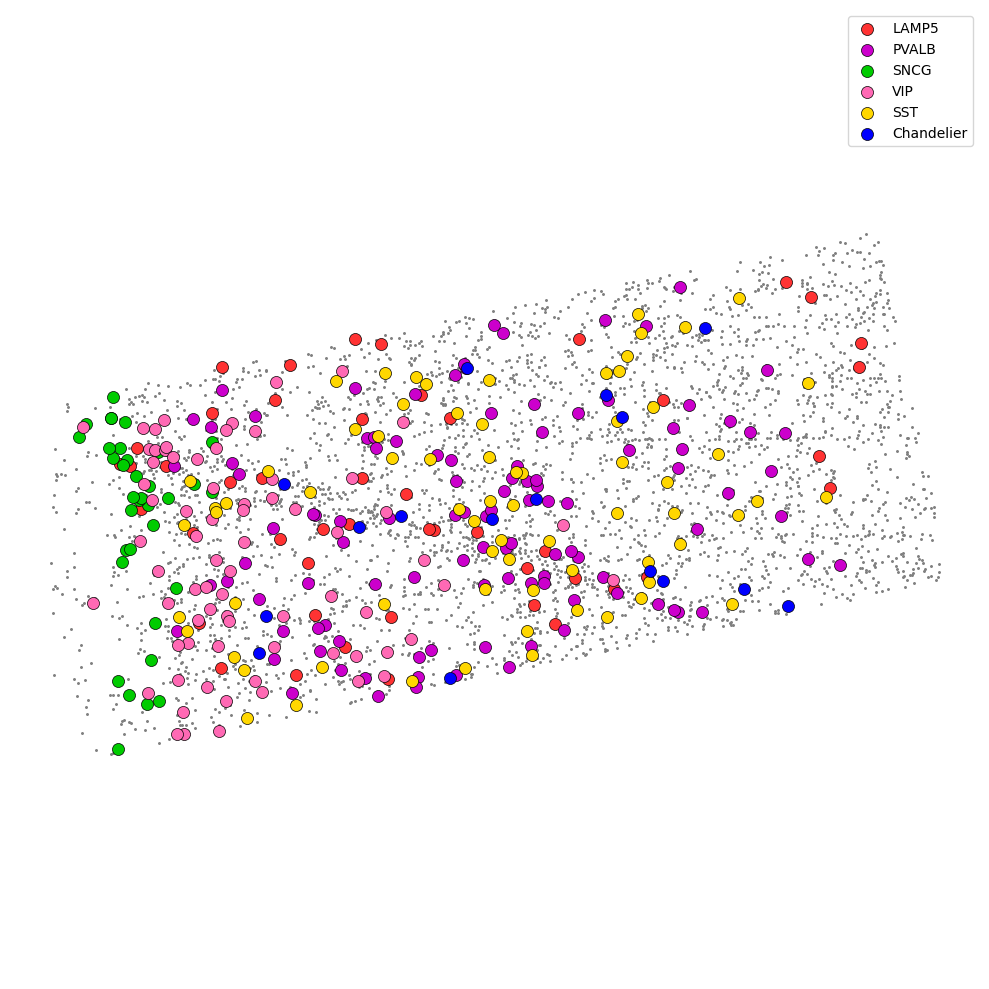

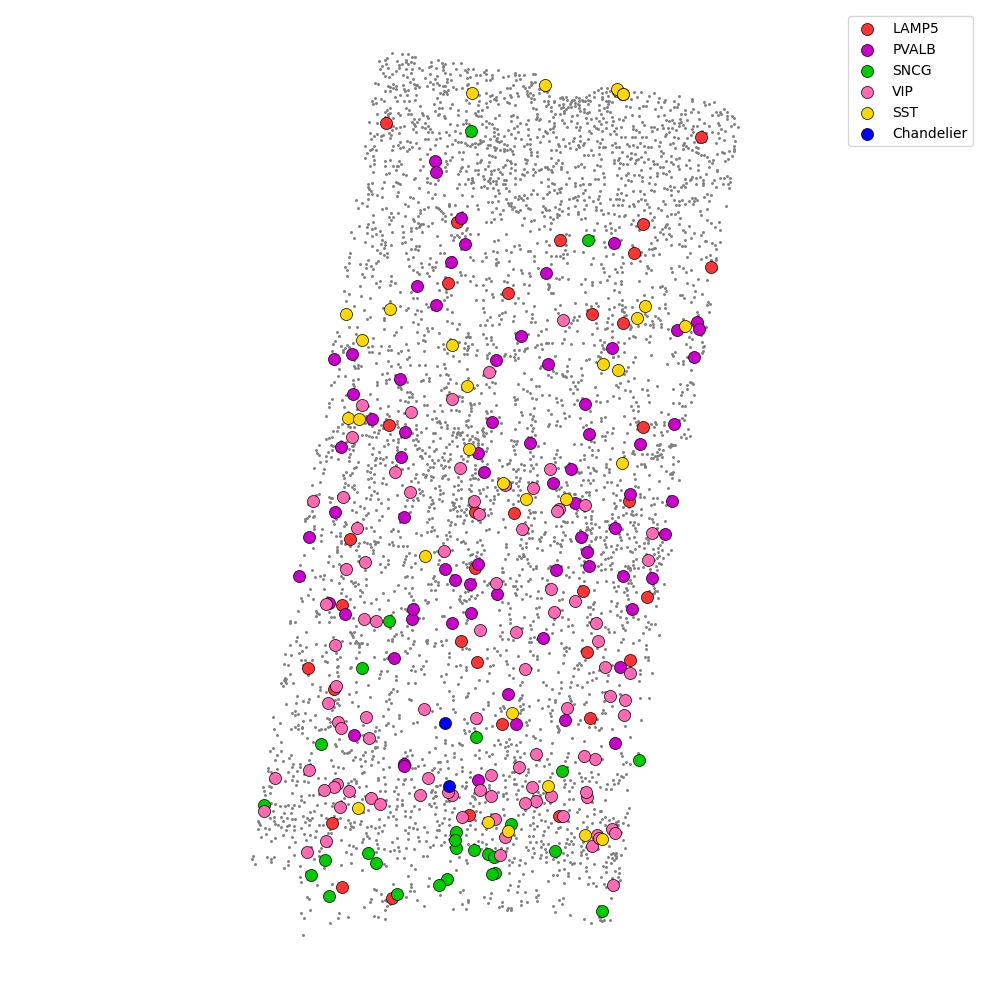

In [39]:
#Inhibitory Neuron column
cmap =['#ff3333',  '#cc00cc',  #LAMP PVALB
    '#00cc00', '#FF69B4',  '#FFD700',  #SNCG, VIP
    '#0000ff' # SST, Chandelier 
      ]

plot_cluster_name_scdata(C5_p_1,cmap,clusters=['LAMP5','PVALB','SNCG',  'VIP','SST','Chandelier',],transpose=1,flipx=1,flipy=-1,sbig=300,small=5);
plot_cluster_name_scdata(H8_p_1,cmap,clusters=['LAMP5','PVALB','SNCG',  'VIP','SST','Chandelier',],transpose=1,flipx=1,flipy=-1,sbig=300,small=5);

In [ ]:
##################################################
#### FIGURE 2I
##################################################

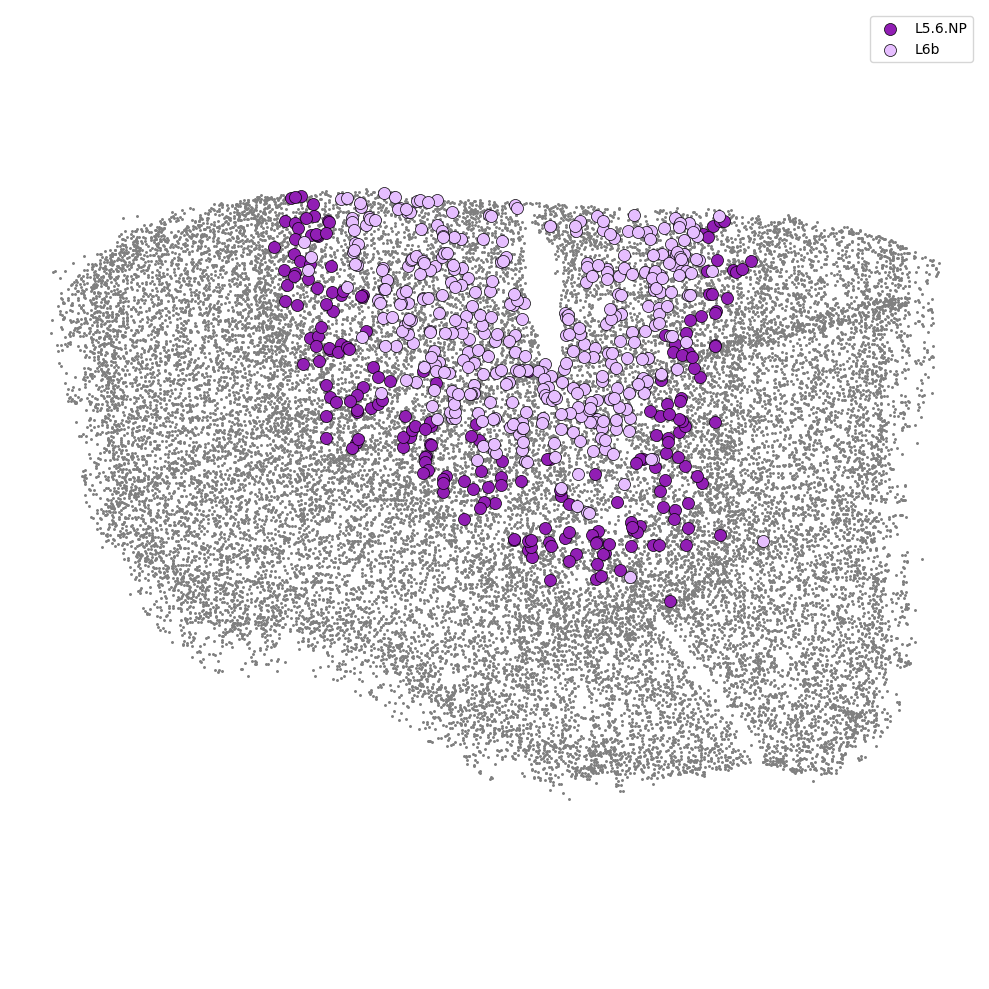

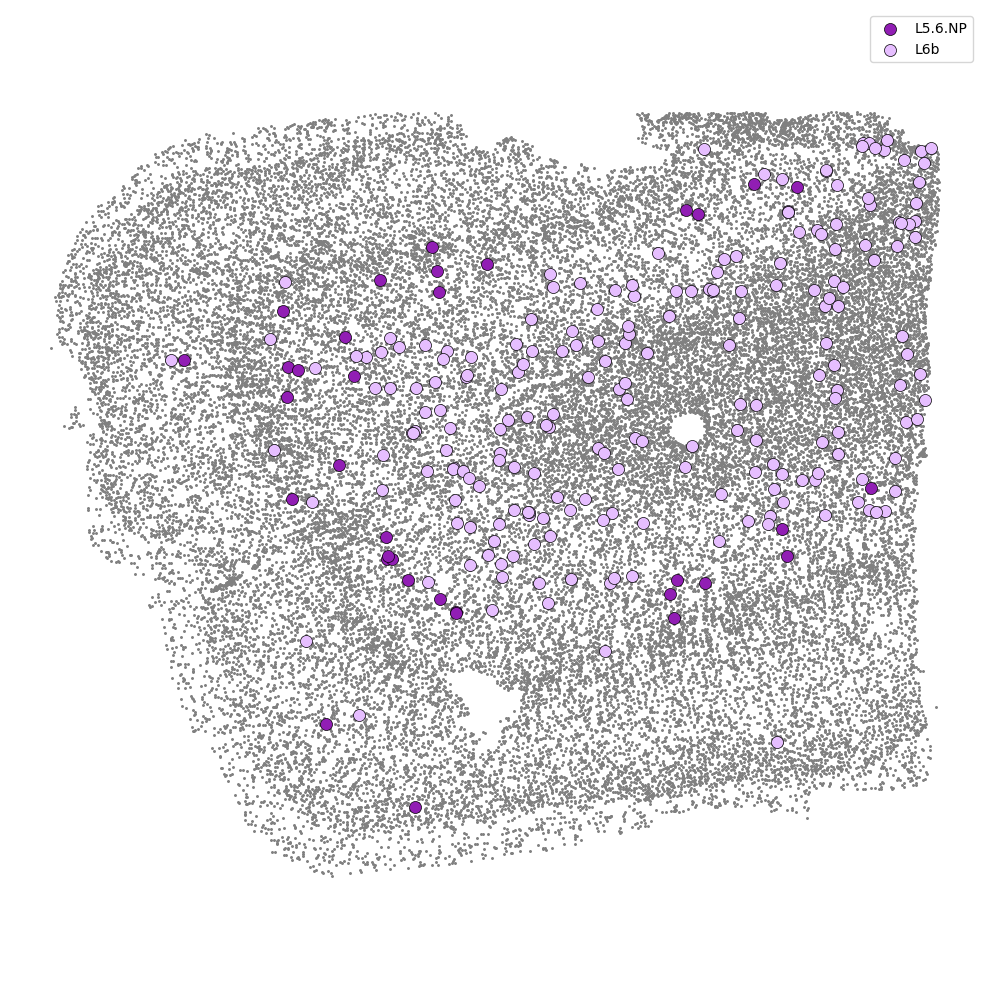

In [35]:
#Excittaory Nuerons Lost
cmap = [ "#911eb4", #L56NP
    '#e6beff', #L6b
       ]

plot_cluster_name_scdata(C5,cmap,clusters=['L5.6.NP', 'L6b'],transpose=1,flipx=1,flipy=1,sbig=300,small=5);
plot_cluster_name_scdata(H8,cmap,clusters=['L5.6.NP', 'L6b'],transpose=1,flipx=1,flipy=1,sbig=300,small=5);

In [ ]:
##################################################
#### FIGURE 2J
##################################################

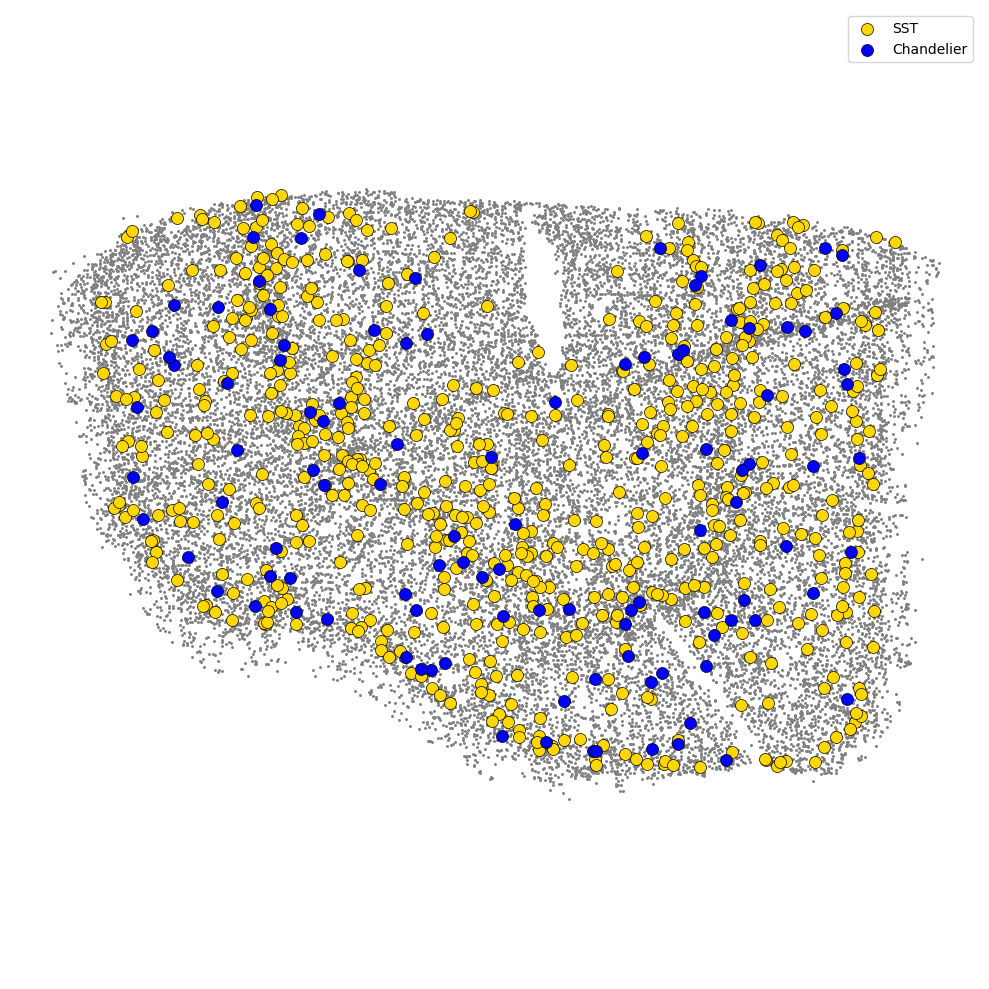

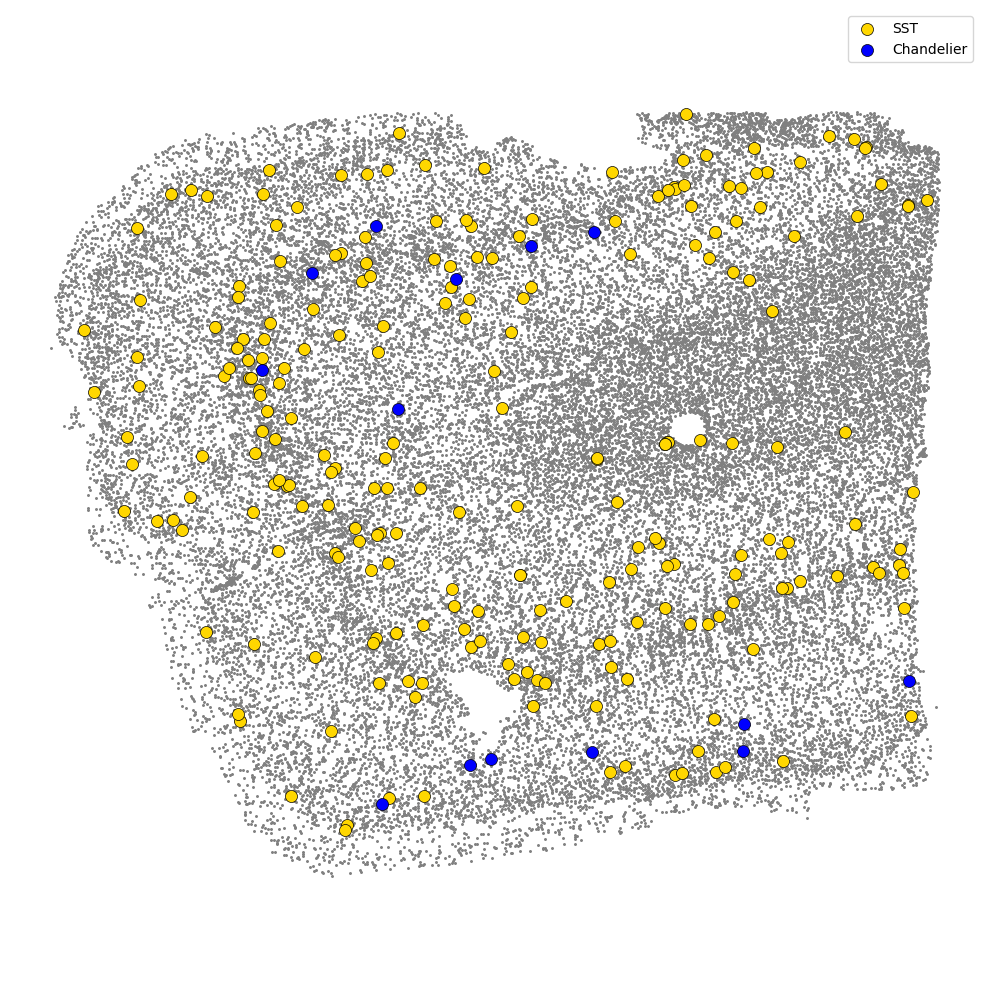

In [37]:
#Inhibitory Nuerons Lost
cmap =['#FFD700',  #SNCG, 
     '#0000ff' # SST, Chandelier
      ]

plot_cluster_name_scdata(C5,cmap,clusters=['SST','Chandelier'],transpose=1,flipx=1,flipy=1,sbig=300,small=5);
plot_cluster_name_scdata(H8,cmap,clusters=[  'SST','Chandelier'],transpose=1,flipx=1,flipy=1,sbig=300,small=5);

### Quantification of cell types per layer. Saved quantification at "cell_counts_by_layer.csv"

In [ ]:
##################################################
#### SUPPLEMENTARY FIGURE 7A: Spatial Projection of layer mask
##################################################

In [ ]:
adata_188=sc.read_h5ad('../W_Data_Short/adata_short.h5ad')

In [110]:
cmap = [
    '#4363d8', '#bfef45', #L2, L3, 
    '#42d4f4', # L4 '#FF6347','#FF6347','#FF6347', #L4.5,
    '#911eb4', '#f032e6','#f58231', #L56NP, L5ET, L5
    '#ffe119',   '#e6194B','#008080', '#e6beff', #L6CT, L6, L6Car3, L6b
]

colors_light = ['#4363d8', '#bfef45', '#42d4f4','#f58231','#e6194B','#D3D3D3','#D3D3D3']
layers = ['L2.IT','L3.IT','L4.IT','L5.IT','L6.IT','Astro.WM','Astro.P',]

In [127]:
upatient= adata_188.obs['patient'].unique()

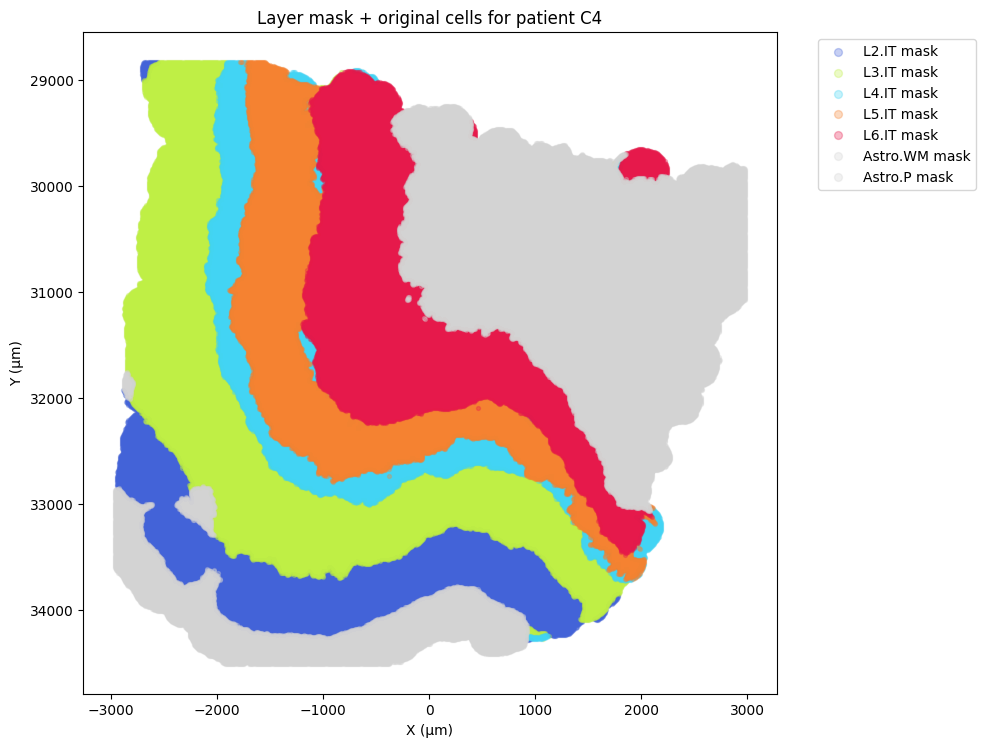

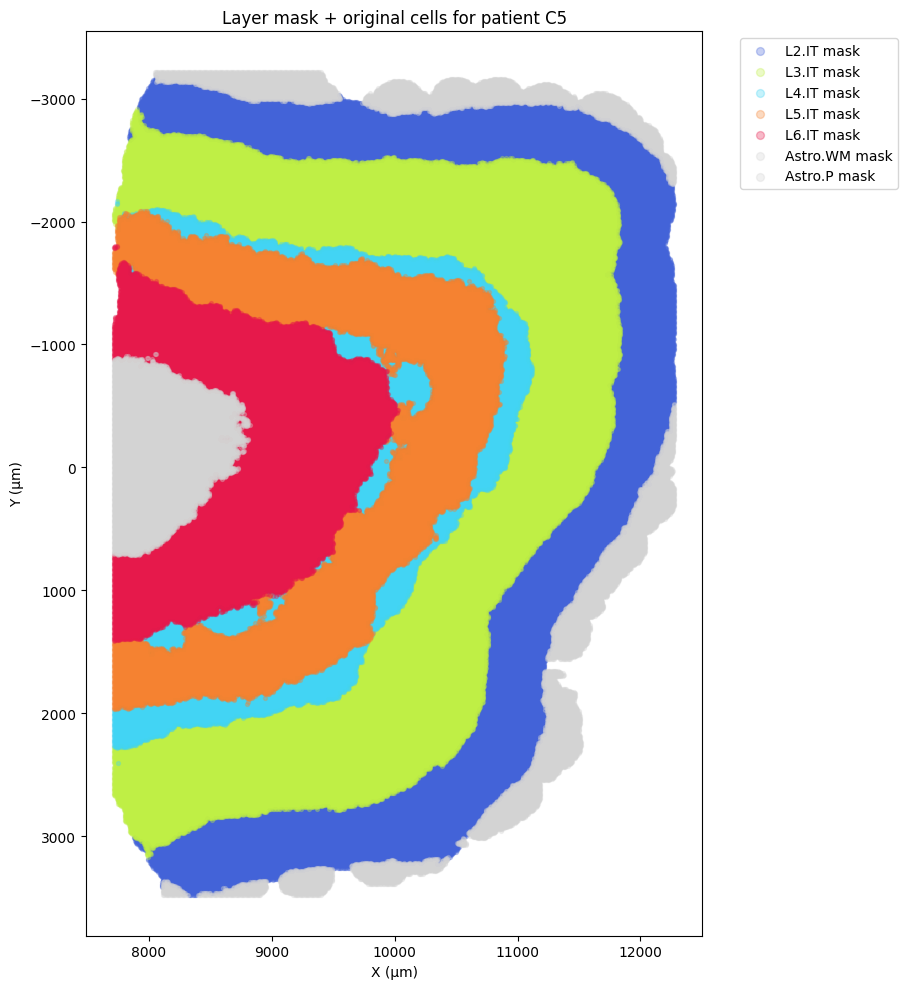

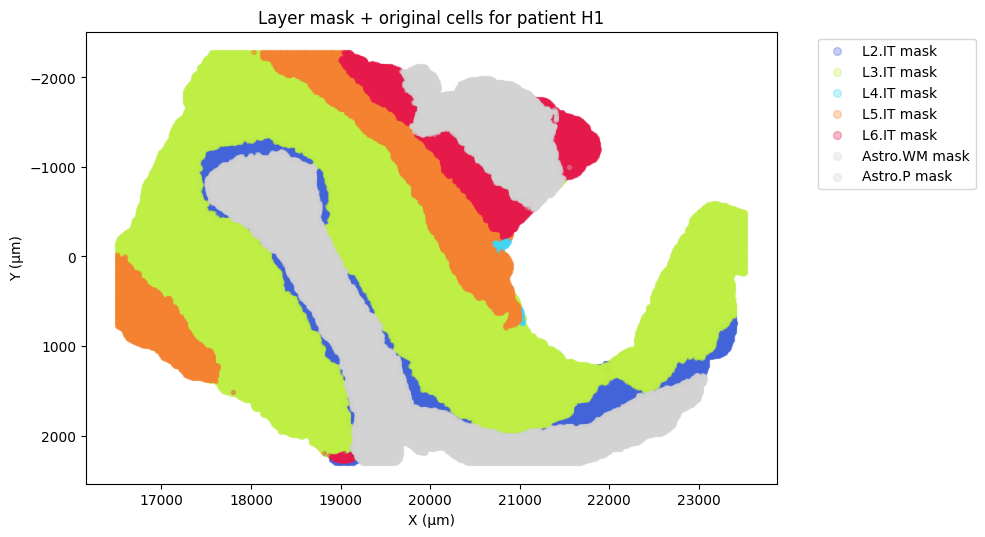

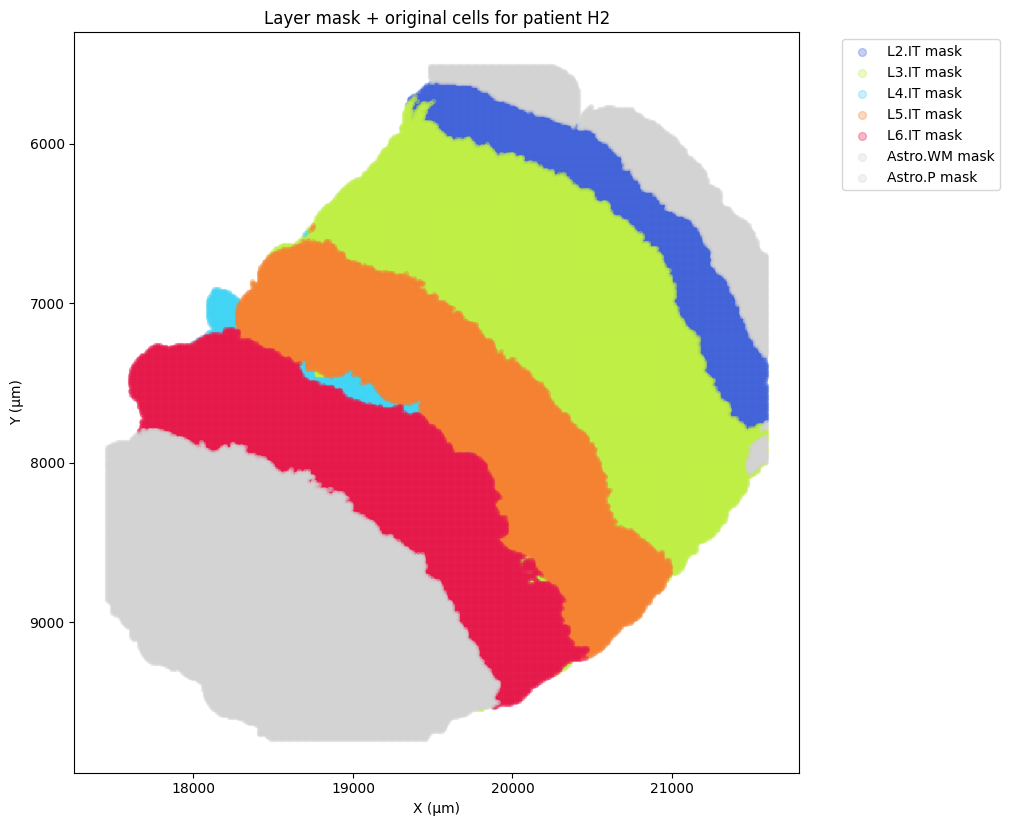

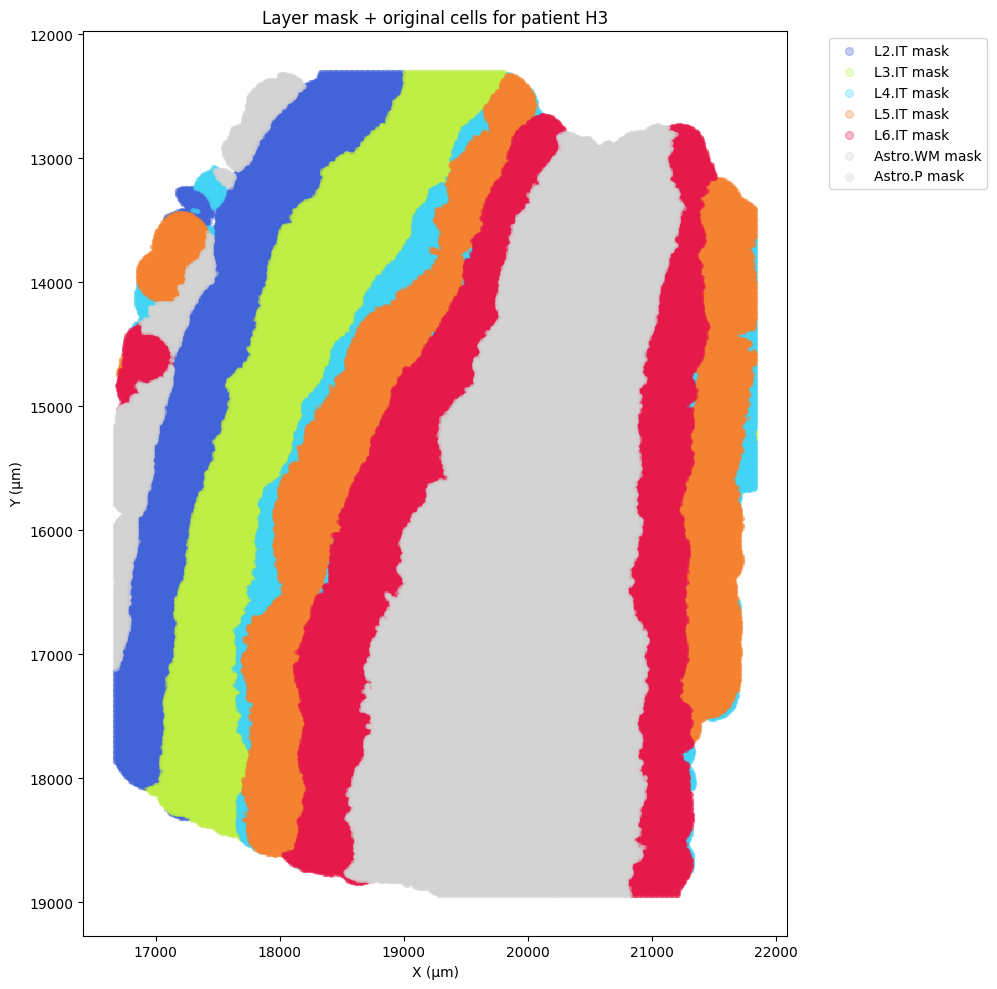

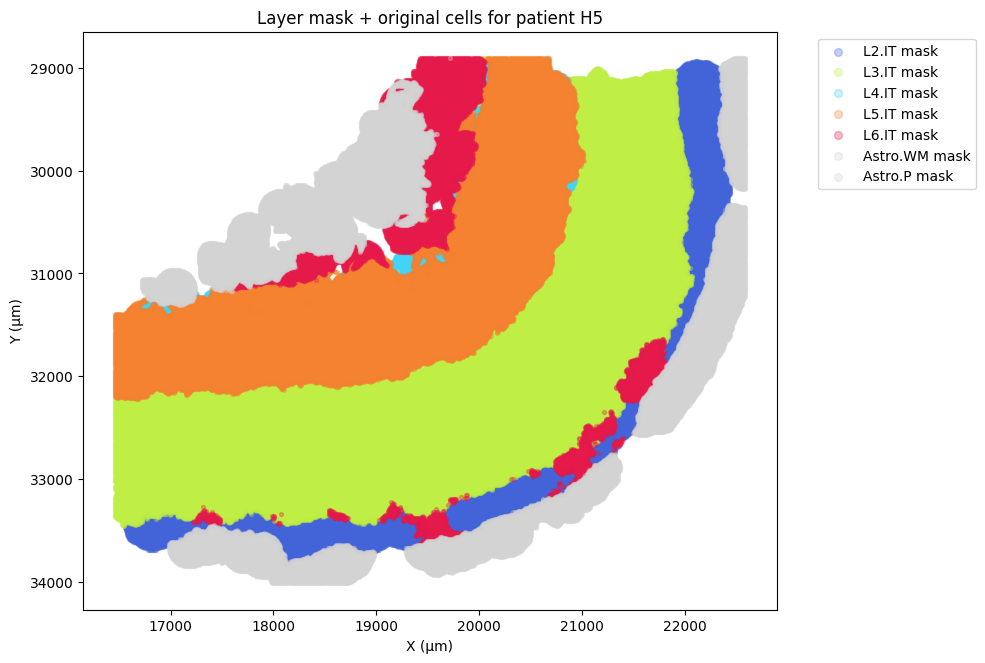

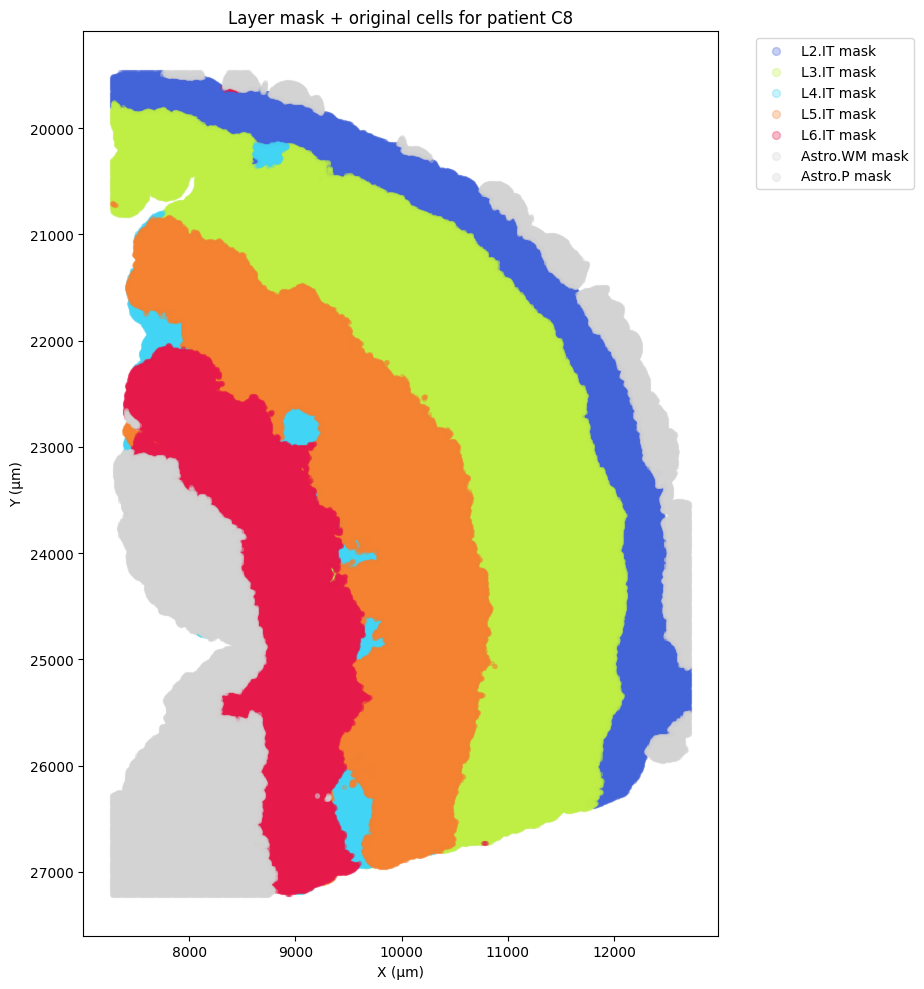

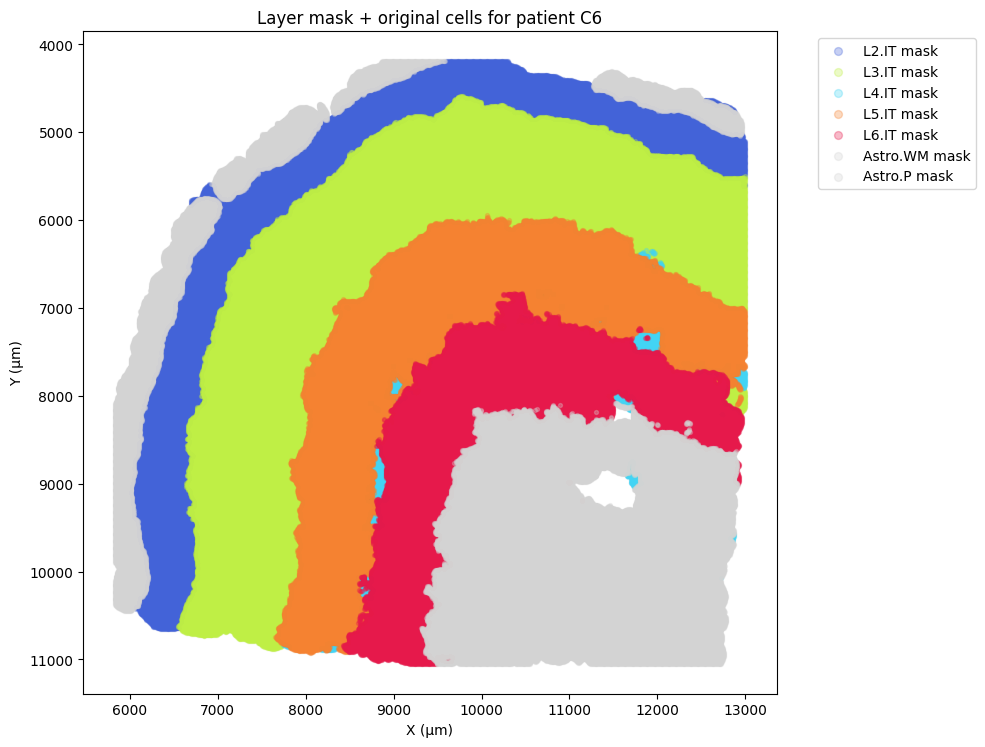

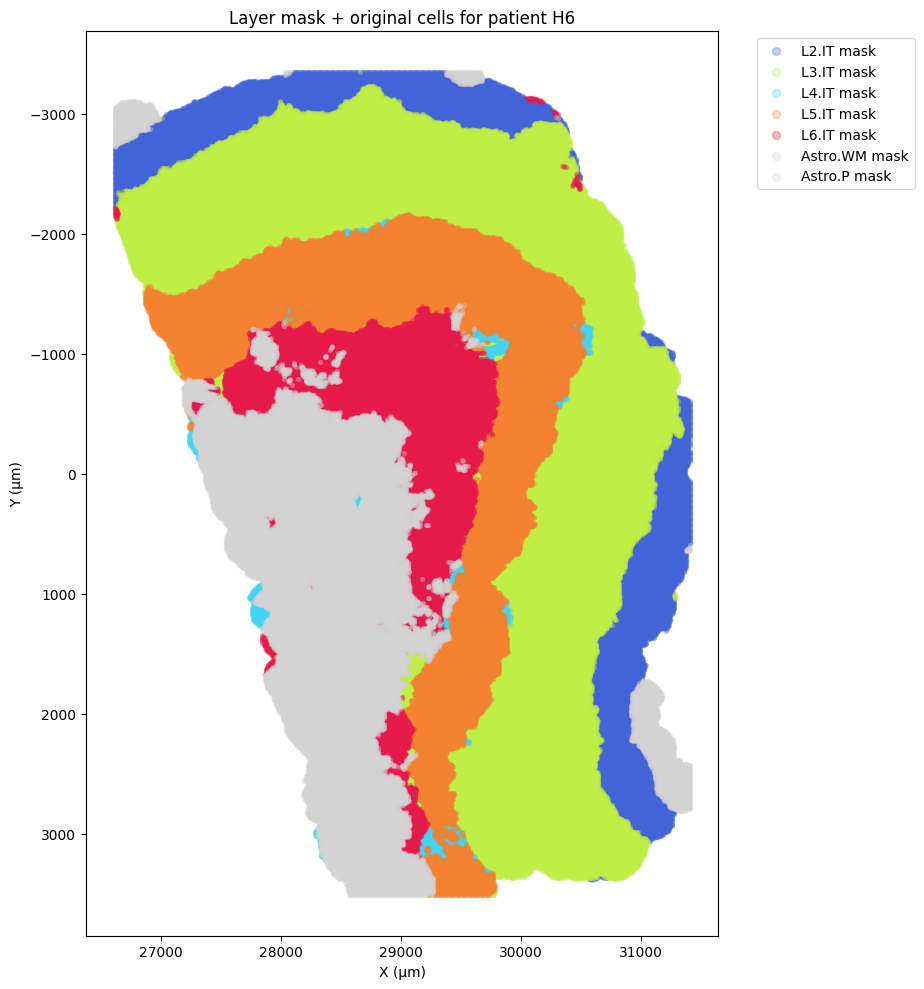

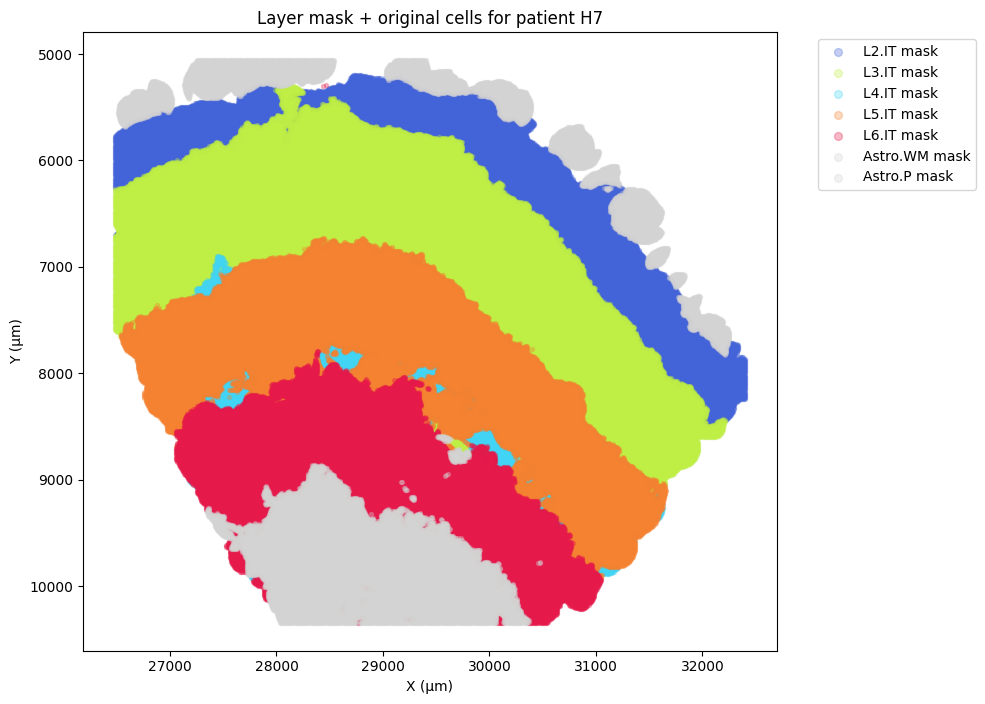

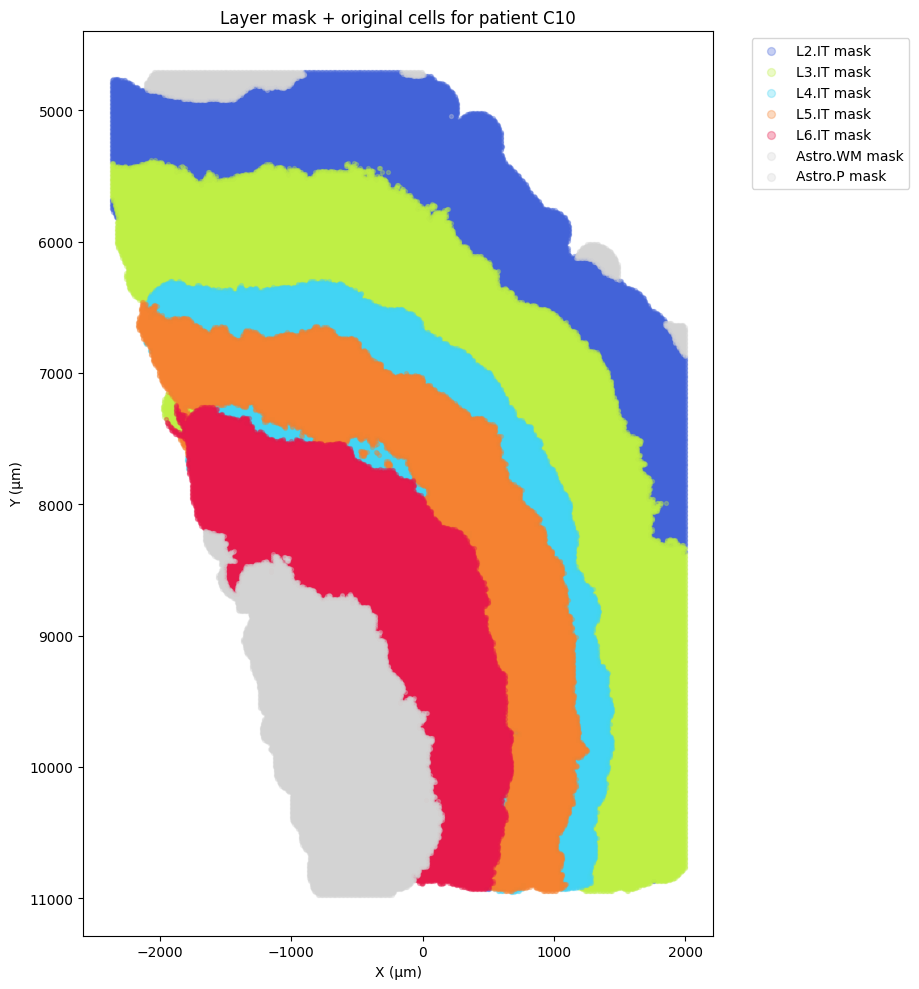

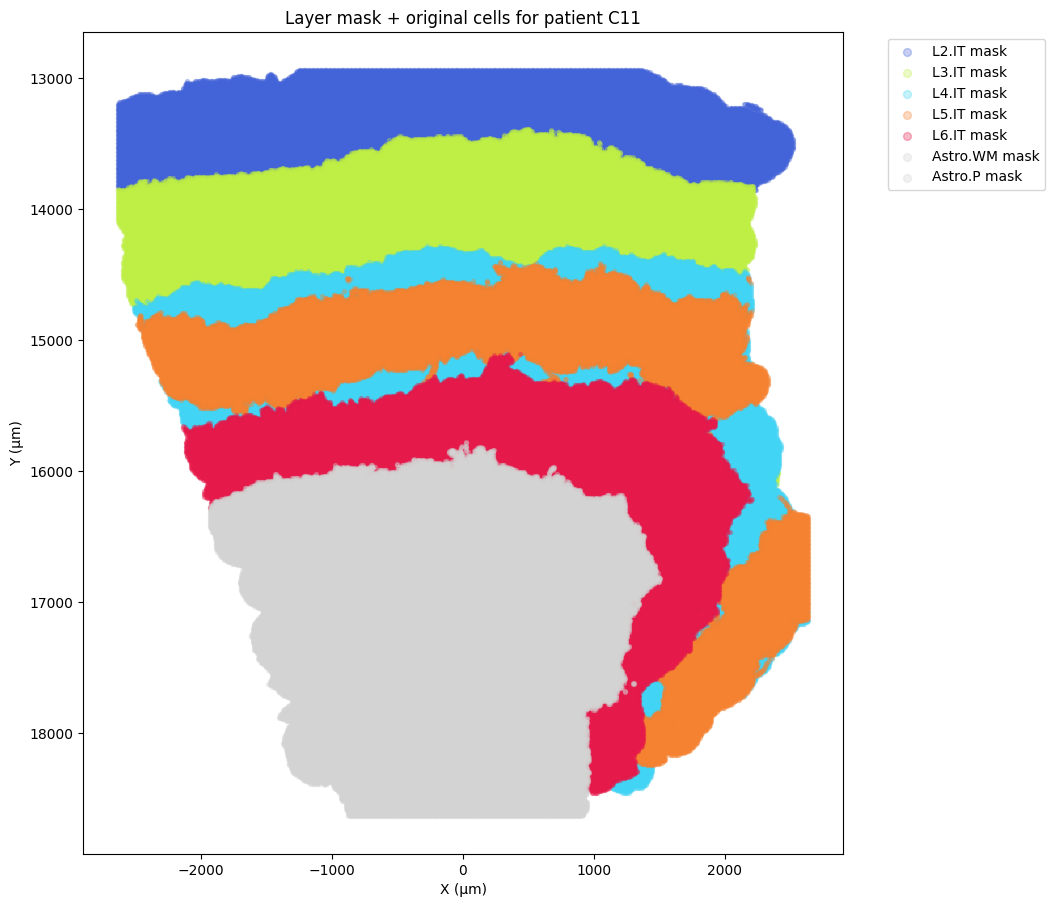

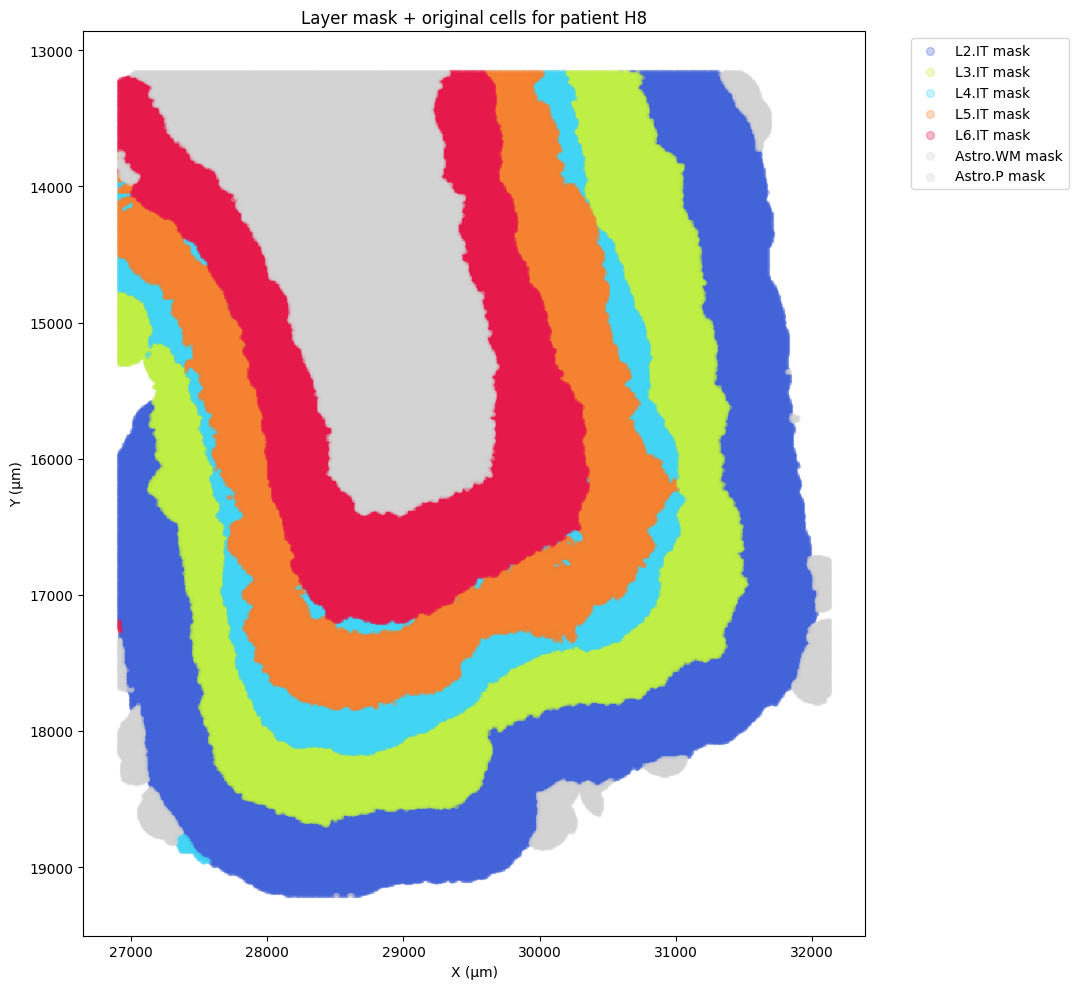

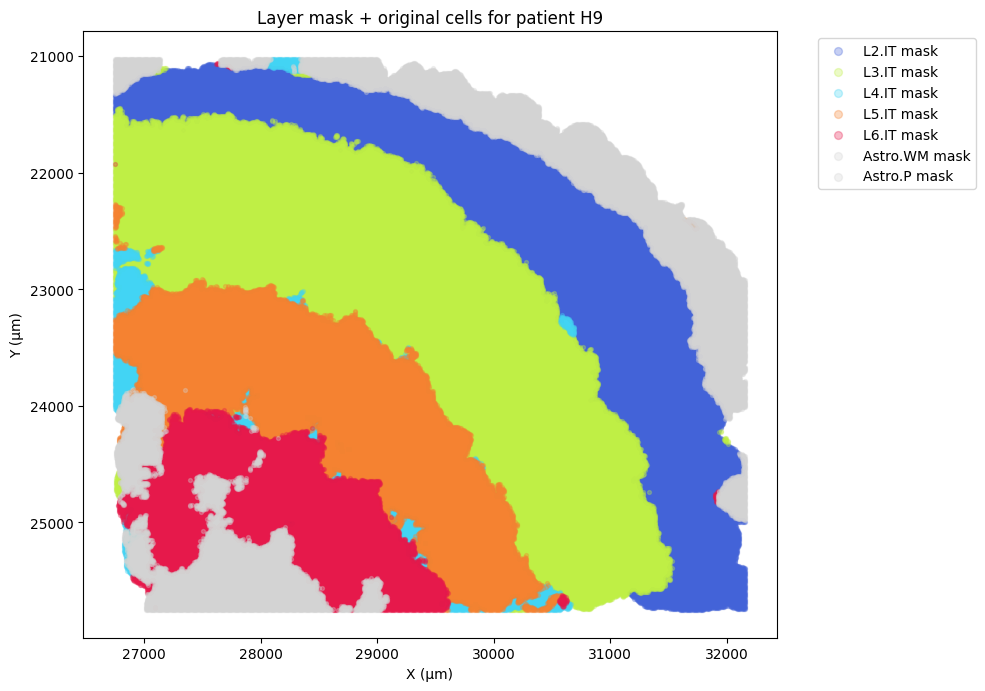

In [128]:
for pt in upatient:
    scdata_ = adata_all[adata_all.obs['patient']==pt]
    
    X = scdata_.obsm['X_spatial'].copy()
    cluster_names = np.array(scdata_.obs['cluster_names'])
    iscelltype = np.in1d(cluster_names, layers)
    X = X[iscelltype]
    cluster_names = cluster_names[iscelltype]
    
    m = np.min(X,axis=0)
    M = np.max(X,axis=0)
    res = 10  # resolution in microns
    Xp = np.array([(x_,y_) for x_ in np.arange(m[0],M[0],res)
                            for y_ in np.arange(m[1],M[1],res)])
    
    tree = KDTree(X)
    dd, nn = tree.query(Xp, k=100)  # look at 100 neighbors
    cls = cluster_names[nn]
    cls[dd>200] = ''  # ignore points farther than 200um
    
    cts_per_layer = np.array([np.sum(cls==l,axis=-1) for l in layers]).T
    layersF = np.argmax(cts_per_layer,axis=-1)
    ncells = np.sum(cts_per_layer,axis=1)
    
    valid_mask = ncells > 1
    Xpf = Xp[valid_mask]
    layersF = layersF[valid_mask]

    # PLOT
    plt.figure(figsize=(10, 10))
    # plot layer mask (background)
    for i, layer in enumerate(layers):
        plt.scatter(Xpf[layersF==i,0], Xpf[layersF==i,1],
                    s=8, c=colors_light[i], alpha=0.3, label=f'{layer} mask')

    plt.title(f"Layer mask + original cells for patient {pt}")
    plt.xlabel('X (µm)')
    plt.ylabel('Y (µm)')
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal') 
    plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [113]:
mean_area_by_layer = {}

for patient, sections in patient_sections.items():
    all_section_area = {layer: [] for layer in layers}
    
    for scdata_ in sections:
        X = scdata_.obsm['X_spatial'].copy()
        cluster_names = np.array(scdata_.obs['cluster_names'])
        iscelltype = np.in1d(cluster_names, layers)
        X = X[iscelltype]
        cluster_names = cluster_names[iscelltype]
        
        # Build spatial grid
        m, M = np.min(X, axis=0), np.max(X, axis=0)
        res = 10  # resolution in microns
        Xp = np.array([(x_, y_) for x_ in np.arange(m[0], M[0], res)
                                  for y_ in np.arange(m[1], M[1], res)])
        
        # Nearest neighbors
        tree = KDTree(X)
        dd, nn = tree.query(Xp, k=100)
        cls = cluster_names[nn]
        cls[dd > 200] = ''  # mask distant grid points
        
        # Count and classify
        cts_per_layer = np.array([np.sum(cls == l, axis=-1) for l in layers]).T
        layersF = np.argmax(cts_per_layer, axis=-1)
        ncells = np.sum(cts_per_layer, axis=1)
        
        valid_mask = ncells > 1
        Xpf = Xp[valid_mask]
        layersF = layersF[valid_mask]

        area_counts = {}
        for i, layer in enumerate(layers):
            area_counts[layer] = np.sum(layersF == i) * (res ** 2)
            all_section_area[layer].append(area_counts[layer])

            # NEW: Count all cells (not just those used to build the mask) per layer
            cell_counts_by_layer = {layer: {} for layer in layers}
            
            for i, layer in enumerate(layers):
                layer_mask = layersF == i
                if not np.any(layer_mask):
                    continue
    
                # Get region coordinates for that layer
                layer_coords = Xpf[layer_mask]
    
                # Build KDTree to find nearby cells to this layer region
                full_X = scdata_.obsm['X_spatial'].copy()
                full_clusters = np.array(scdata_.obs['cluster_names'])
    
                tree_layer = KDTree(layer_coords)
                dists, _ = tree_layer.query(full_X, k=1)
    
                # Define which cells are within 50 µm of the layer region
                within_layer = dists < 50  # adjust radius if needed
                layer_cell_types = full_clusters[within_layer]
    
                # Count cell types in this layer
                layer_counts = pd.Series(layer_cell_types).value_counts().to_dict()
                cell_counts_by_layer[layer] = layer_counts

        if 'celltype_counts_all' not in locals():
            celltype_counts_all = {}

        for layer, cdict in cell_counts_by_layer.items():
            for cell_type, count in cdict.items():
                key = (patient, layer, cell_type)
                celltype_counts_all.setdefault(key, []).append(count)
    
    # Average area across sections
    mean_counts = {layer: np.mean(all_section_area[layer]) for layer in layers}
    mean_area_by_layer[patient] = pd.DataFrame({
        'Layer': layers,
        'Mean Area': [mean_counts[layer] for layer in layers]
    })

In [116]:
rows = []
for (patient, layer, cell_type), counts in celltype_counts_all.items():
    rows.append({
        'Patient': patient,
        'Layer': layer,
        'Cell Type': cell_type,
        'Mean Count': np.mean(counts),
        'Total Count': np.sum(counts),
        'N Sections': len(counts)
    })

counts_by_layer_celltype = pd.DataFrame(rows)
counts_by_layer_celltype.to_csv("cell_counts_by_layer.csv", index=False)

### Quantification of HTT expression per cell cluster:

In [118]:
adata_188=sc.read_h5ad('../W_Data_Short/adata_short.h5ad')

In [119]:
adata_188_f=adata_188[adata_188.obs['cluster_names']!=''].copy()
CTL=adata_188_f[adata_188_f.obs['HD']==False].copy()
HD=adata_188_f[adata_188_f.obs['HD']==True].copy()
CTL_Neuron = CTL[CTL.obs['cluster_general'].isin(['Inhibitory Neurons', 'Excitatory Neurons'])].copy()

In [120]:
Exc_sorted_categories=['Excitatory Neurons', 'Inhibitory Neurons', 'OPC', 'Astrocytes', 'Oligodendrocytes', 'Microglia', 'Endothelial', 'VLMC'] 
Neurons_sorted_categories=["L2.IT", "L3.IT", "L4.IT",'L5.IT', 'L5.ET', "L5.6.NP", 'L6.IT', "L6.CT",'L6.IT.Car3','L6b',"Chandelier","LAMP5", "PVALB", "SNCG", "SST",'VIP',]

In [122]:
##################################################
#### FIGURE 2K: HTT Expression per major cluster
##################################################

/Users/Olatz/anaconda3/envs/napari/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Olatz/anaconda3/envs/napari/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


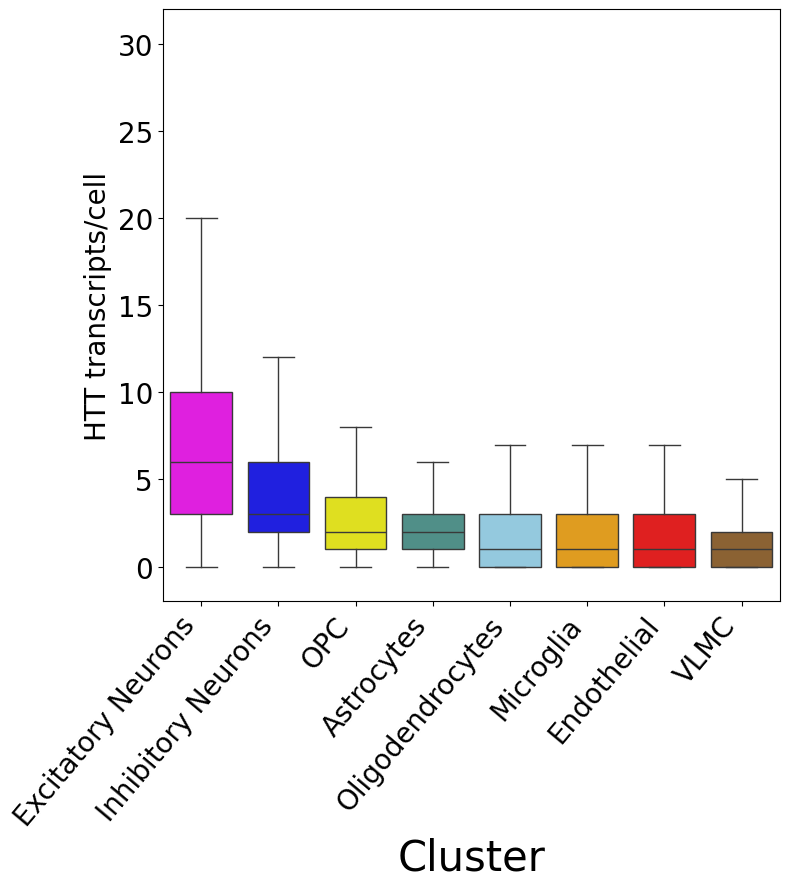

In [121]:
cmap = ['#FF00FF', '#0000ff','yellow', '#469990','#87CEEB','orange','red','#9A6324',
]

ign = CTL.var.index.get_loc('HTT')

x_data = CTL.obs['cluster_general']
y_data = (CTL.obsm['X_raw'][:, ign])

plt.figure(figsize=(8, 9))
sns.boxplot(x=x_data, y=y_data,order=Exc_sorted_categories, palette=cmap, showfliers=False, linewidth=1, color='white' )

#plt.title(f'HTT expression in CTL', fontsize=20)
plt.yticks( fontsize=20) 
plt.xticks(rotation=50, ha='right', fontsize=20) 
plt.xlabel('Cluster', fontsize=30)
plt.ylabel('HTT transcripts/cell', fontsize=20)
plt.ylim(-2,32)
plt.grid(False)
plt.tight_layout()
plt.show()


In [64]:
HTT_clusterg = pd.DataFrame({
    'cluster': CTL.obs['cluster_general'],
    'HTT': CTL.obsm['X_raw'][:, ign]
})

groups = [HTT_clusterg.loc[HTT_clusterg['cluster'] == c, 'HTT'].values 
          for c in HTT_clusterg['cluster'].unique()]

f_stat, p_val = stats.f_oneway(*groups) 

print(f"ANOVA F = {f_stat:.3f}, p = {p_val:.3e}")

ANOVA F = 8582.577, p = 0.000e+00


In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=HTT_clusterg['HTT'],
                          groups=HTT_clusterg['cluster'],
                          alpha=0.05)

print(tukey)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
        Astrocytes        Endothelial   0.3848    0.0  0.2695  0.5001   True
        Astrocytes Excitatory Neurons   5.0114    0.0  4.9221  5.1006   True
        Astrocytes Inhibitory Neurons   2.1098    0.0  1.9968  2.2229   True
        Astrocytes          Microglia   0.1044 0.1493 -0.0165  0.2253  False
        Astrocytes                OPC   0.6786    0.0  0.5309  0.8263   True
        Astrocytes   Oligodendrocytes   0.0293 0.9682 -0.0559  0.1145  False
        Astrocytes               VLMC  -0.3547    0.0 -0.4977 -0.2118   True
       Endothelial Excitatory Neurons   4.6266    0.0  4.5221  4.7311   True
       Endothelial Inhibitory Neurons    1.725    0.0  1.5995  1.8505   True
       Endothelial          Microglia  -0.2804    0.0  -0.413 -0.1478   True

In [ ]:
##################################################
#### FIGURE 2L: HTT Expression per Neuronal cluster
##################################################

/Users/Olatz/anaconda3/envs/napari/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Olatz/anaconda3/envs/napari/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


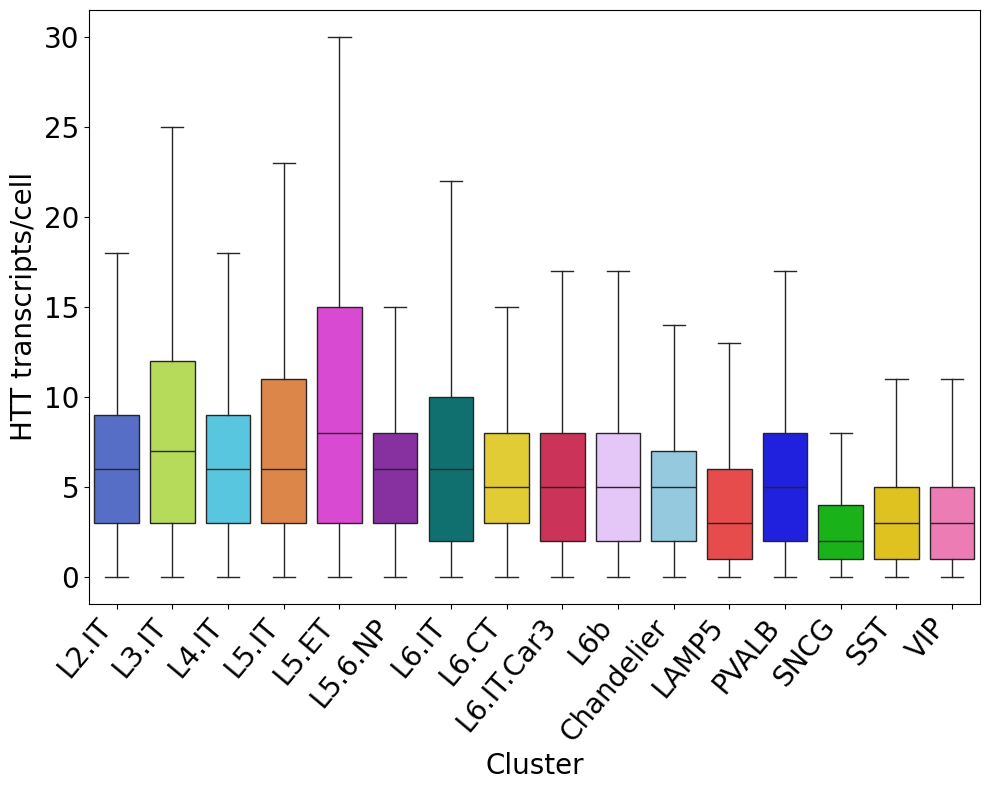

In [66]:
cmap = [
    '#4363d8', '#bfef45', #L2, L3, 
    '#42d4f4',  # L4 '#FF6347','#FF6347','#FF6347', #L4.5,
     '#f58231','#f032e6','#911eb4', #  L5,L5ET, L56NP,
    '#008080', '#ffe119',  '#e6194B', '#e6beff', #L6, L6CT,  L6Car3, L6b
    '#87CEEB','#ff3333',  '#0000ff', #Chandelier LAMP PVALB
    '#00cc00', '#FFD700', '#FF69B4',   #SNCG, VIP
     # SST, Chandelier
    '#ff6666', #LAMP5
    '#0000ff','#9A6324', '#469990',  #SNCG, VIP, SST,
    '#ff99ff', #PVALB  '#cc00cc', 
     #Chandelier
    '#cc00cc', '#800000', '#87CEEB', #"#fabebe" ,'#3cb44b', #Astro GM,  WM , P,
    '#ffff99','#DC143C', #OPC
    '#99ff99',  '#FFD700',  #'#ADFF2F', '#00FA9A','#99ccff', #Oligo GM, WM
    '#FF0000', #Endo
    '#fabed4', #VLMC
    '#ffcc99',  '#00CED1',  # '#20B2AA', #, #Microglia, 
    '#00cc00', #Pericyte
]

ign = CTL_Neuron.var.index.get_loc('HTT')


x_data = CTL_Neuron.obs['cluster_names']
y_data = (CTL_Neuron.obsm['X_raw'][:, ign])


plt.figure(figsize=(10, 8))
sns.boxplot(x=x_data, y=y_data,order=Neurons_sorted_categories, palette=cmap, showfliers=False, linewidth=1, color='white')

plt.xticks(rotation=50, ha='right', fontsize=20) 
plt.yticks( fontsize=20) 
plt.xlabel('Cluster', fontsize=20)
plt.ylabel('HTT transcripts/cell', fontsize=20)
#plt.ylim(0,35)
plt.grid(False)
plt.tight_layout()
plt.show()

In [69]:
HTT_neurons = pd.DataFrame({
    'cluster': CTL_Neuron.obs['cluster_names'],
    'HTT': CTL_Neuron.obsm['X_raw'][:, ign]
})
groups = [HTT_neurons.loc[HTT_neurons['cluster'] == c, 'HTT'].values 
          for c in HTT_neurons['cluster'].unique()]
f_stat, p_val = stats.f_oneway(*groups) 
print(f"ANOVA F = {f_stat:.3f}, p = {p_val:.3e}")

ANOVA F = 429.633, p = 0.000e+00


In [ ]:
##################################################
#### FIGURE 2M: HTT Expression vs Cell Loss
##################################################

In [123]:
mean_htt_per_cluster = HTT_neurons.groupby('cluster', as_index=False)['HTT'].mean()
mean_htt_per_cluster = mean_htt_per_cluster.sort_values('HTT', ascending=False)

/var/folders/7p/t1dymgvj689ffh7fbygsmbzc0000gp/T/ipykernel_52699/1995930299.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_htt_per_cluster = HTT_neurons.groupby('cluster', as_index=False)['HTT'].mean()


In [124]:
percent_lost_df_neu = {
    'cluster': ['L2.IT', 'L3.IT', 'L5.IT', 'L4.IT', 'L5.ET', 'L5.6.NP', 'L6.IT', 'L6.CT', 'L6.Car3', 'L6b','Chandelier', 'LAMP5', 'PVALB', 'SNCG', 'SST', 'VIP' ],
    'Percent Lost': [38.965629, 7.597639, 21.390964, 44.542414, 9.159061, 84.112792, 24.816347, 42.304075, 2.011352, 53.409478,55.550050,7.380457, 14.008406,  -1.760563,   51.870968, 4.372169 ]
}
percent_lost_df_neu = pd.DataFrame(percent_lost_df_neu)
percent_lost_df_neu.set_index('cluster', inplace=True)

In [125]:
htt_stats_neu = mean_htt_per_cluster.merge(percent_lost_df_neu, on='cluster', how='inner')

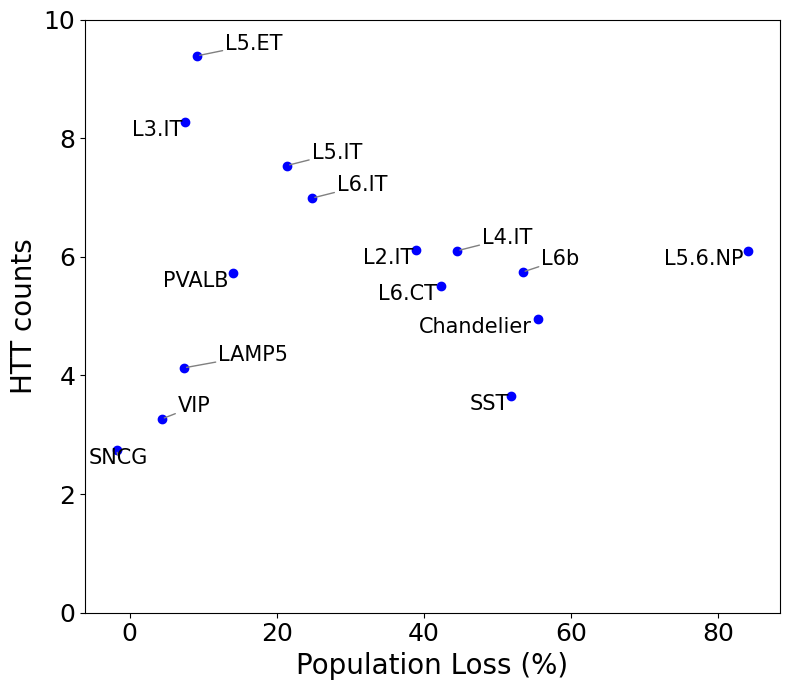

Linear Regression Coefficients:
Slope (Coefficient of Percent Lost): -2.7640512370877767e-05
Intercept: 5.749081198080003
R-squared: 1.3690623024142923e-07
Spearman r: 0.111, p = 0.69


In [126]:
X = htt_stats_neu[['Percent Lost']]
y = htt_stats_neu['HTT']  

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(8, 7))
plt.scatter(X, y, color='blue', label='Data')

texts = []
for i, row in htt_stats_neu.iterrows():
    texts.append(plt.text(row['Percent Lost'], row['HTT'], row['cluster'], fontsize=15))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

r, p = spearmanr(X.values.ravel(), y.values.ravel())

plt.xlabel('Population Loss (%)', size=20)
plt.ylabel('HTT counts', size=20)
plt.yticks(size=18)
plt.xticks(size=18)
plt.ylim(0,10)
plt.title('')
plt.tight_layout()
plt.grid(False)
plt.show()

print(f'Linear Regression Coefficients:')
print(f'Slope (Coefficient of Percent Lost): {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')
print(f"Spearman r: {r:.3f}, p = {p:.2f}")